# HR Analytics Project- Understanding the Attrition in HR

### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing Libraries

In [1]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler

# To display all columns
pd.pandas.set_option('display.max_columns',None)

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# -------------------------------Getting to Know About Data---------------------------------------


# Reading File

In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## 1. Overall Data Analysis

In [5]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (1470, 35)


In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [8]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,4,Male,37,3,4,Sales Executive,3,Single,13872,24409,0,Y,No,13,3,3,80,0,38,1,2,37,10,1,8
653,50,No,Non-Travel,881,Research & Development,2,4,Life Sciences,1,905,1,Male,98,3,4,Manager,1,Divorced,17924,4544,1,Y,No,11,3,4,80,1,31,3,3,31,6,14,7
287,38,No,Travel_Rarely,688,Research & Development,23,4,Life Sciences,1,393,4,Male,82,3,2,Healthcare Representative,4,Divorced,5745,18899,9,Y,No,14,3,2,80,1,10,2,3,2,2,1,2
1085,31,Yes,Travel_Frequently,561,Research & Development,3,3,Life Sciences,1,1537,4,Female,33,3,1,Research Scientist,3,Single,4084,4156,1,Y,No,12,3,1,80,0,7,2,1,7,2,7,7
141,45,No,Travel_Rarely,1316,Research & Development,29,3,Medical,1,192,3,Male,83,3,1,Research Scientist,4,Single,3452,9752,5,Y,No,13,3,2,80,0,9,2,2,6,5,0,3
894,54,No,Travel_Rarely,685,Research & Development,3,3,Life Sciences,1,1250,4,Male,85,3,4,Research Director,4,Married,17779,23474,3,Y,No,14,3,1,80,0,36,2,3,10,9,0,9
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6
693,36,Yes,Travel_Rarely,530,Sales,3,1,Life Sciences,1,967,3,Male,51,2,3,Sales Executive,4,Married,10325,5518,1,Y,Yes,11,3,1,80,1,16,6,3,16,7,3,7
826,38,No,Travel_Rarely,433,Human Resources,1,3,Human Resources,1,1152,3,Male,37,4,1,Human Resources,3,Married,2844,6004,1,Y,No,13,3,4,80,1,7,2,4,7,6,5,0
114,34,No,Travel_Rarely,1031,Research & Development,6,4,Life Sciences,1,151,3,Female,45,2,2,Research Scientist,2,Divorced,4505,15000,6,Y,No,15,3,3,80,1,12,3,3,1,0,0,0


In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# Removing duplicate values
df.duplicated().sum()

0

### Observation - 
1. There are total 1470 records with 35 columns in each entry.
2. There are total 35 columns as below - 
  - Age: 
  - Attrition: 
  - BusinessTravel: 
  - DailyRate: 
  - Department: 
  - DistanceFromHome: 
  - Education: 
  - EducationField: 
  - EmployeeCount: 
  - EmployeeNumber: 
  - EnvironmentSatisfaction: 
  - Gender: 
  - HourlyRate: 
  - JobInvolvement: 
  - JobLevel: 
  - JobRole: 
  - JobSatisfaction: 
  - MaritalStatus: 
  - MonthlyIncome: 
  - MonthlyRate: 
  - NumCompaniesWorked: 
  - Over18: 
  - OverTime: 
  - PercentSalaryHike: 
  - PerformanceRating: 
  - RelationshipSatisfaction: 
  - StandardHours: 
  - StockOptionLevel: 
  - TotalWorkingYears: 
  - TrainingTimesLastYear: 
  - WorkLifeBalance: 
  - YearsAtCompany: 
  - YearsInCurrentRole: 
  - YearsSinceLastPromotion: 
  - YearsWithCurrManager:
3. There are no duplicate value

## 2. Getting to Know More About Data

In [11]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# 3 Gettting to Know Five Number Summery for Continuous variable¶

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### Observations - 
Looking at count column, there are no missing values. There may be outliers, but no missing values in continuous data
1. Age: Average age of employees is 36
2. DailyRate: Average daily rate is 802.49 with min. rate 102 abd max. rate is 1499
3. DistanceFromHome:
    - For 50% of employees have office within 7 km.
    - Average distance emlpoyee need to travel to reach company is 9.19
4. Education: Education of employees
5. EmployeeCount: Employee count as 1
6. EmployeeNumber: Employee Number
7. EnvironmentSatisfaction:
    - Average employee satisfication is 2.72
    - 50% of employee has satisfication level less than 3
    - 25% of employee has satisfication level less than 2
8. HourlyRate: Average hourly rate of employee is 65.89
9. JobInvolvement: Average 2.729 with min 1 and max 4
10. JobLevel: 50% of employees has job level 1 and 2
11. JobSatisfaction: Average job satisfication is 2.72
12. MonthlyIncome:
    - Average monthly income is 6502.93
    - 50 % of employees has income less than 4919.0
13. MonthlyRate: Average monthly rate of employee is 14313.103401
14. NumCompaniesWorked: Record having employees with 0 to 9 companies
15. PercentSalaryHike:
    - Average salary hike is 15.20%
    - 50% of emplpyees received, 14 % Salary hike
    - Minimum salary hike is 11% and maximum 25%
16. PerformanceRating:
    - All have performance rating of 3 and 4
17. RelationshipSatisfaction: Average relation satisfaction is 2.71
18. StandardHours: 80 Hours, Constant for all employees
19. StockOptionLevel: Average = 0.79, min = 1 and max = 3
20. TotalWorkingYears:
    - Average working years are 11.27
    - min is 0 and max is 40 years
    - 25% employees has experiance less than 6
    - 25% employees has experiance between 6 and 10
21. TrainingTimesLastYear: Total training time last year
22. WorkLifeBalance: Graded between 1 to 4 with average of 2.76
23. YearsAtCompany: 
    - 25% of employee has 9 to 40 years of experiance in this company
24. YearsInCurrentRole: with average of 4.229
25. YearsSinceLastPromotion: Employee get promotion in every 2 years (Average)
26. YearsWithCurrManager: 25%-25% employees have spent 0-2 and 7-17 years with current manager

# 4 Gettting to Know about Categorical Variable

In [13]:
df.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Observations - 
There are less than 10 categories in each of qualitative data. This information will help us to plot various plots to undersand data.
1. Attrition: There are only two categories (Yes/No): With mode of "No" having frequency of 1233, for Yes it counts as 337
2. BusinessTravel: Three category, with mode as "Travel_Rarely" with freq. as 1043
3. Department: Three departments, with mode of "Research & Development" with frequency of 961
4. EducationField: 6 Category, with max "Life Sciences" counted 606
5. Gender: 2 cate, with mode of male with 882 count.
6. JobRole: 9 job role, with more sale execuative (326)
7. MaritalStatus: Most of the men working are Marrieed (673)
8. Over18: As per rule/qualification required, all employees must be above 18 years.
9. OverTime: Most of employees are not doing overtime. Only 416 

# 5 Getting to Know About Missing Values

In [14]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 0 missing values in dataset


In [15]:
# Feature Wise missing Values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Observation - 
From results we can see that, there are no missing values in dataset

# --------------------------------------------------EDA------------------------------------------------------

# 1 Seperating Data as categorical and Numerical Data

In [16]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [17]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [18]:
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [19]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 9
Total Numerical Features are 26


### Observation - 
1. Total Categorical features are 9
2. Total Numerical Features are 26

# 2 Plotting to understand Data Distribution

No     1233
Yes     237
Name: Attrition, dtype: int64


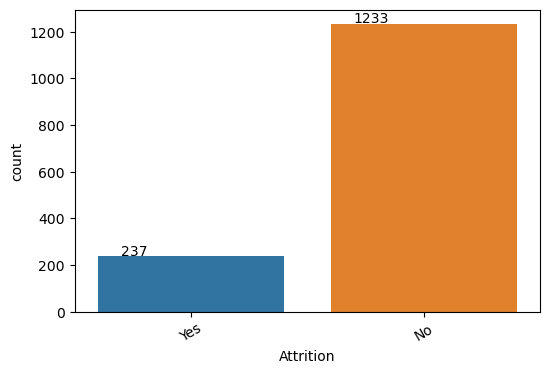

In [20]:
# Countplot for Attrition
plt.figure(dpi=100)
plot = sns.countplot('Attrition',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Attrition.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. For 1233 havent departed
2. 237 Employees departed from company

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


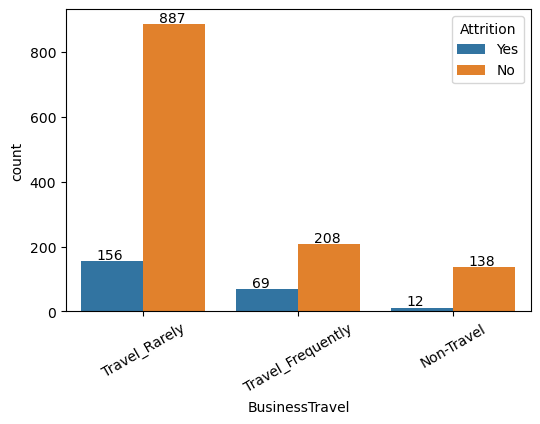

In [21]:
# Countplot for BusinessTravel
plt.figure(dpi=100)
plot = sns.countplot('BusinessTravel',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.BusinessTravel.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
- Employee who travel frequently have more chances of departure (Almost 25%)
- Distribution as 
    1. Travel_Rarely = 1043
    2. Travel_Frequently = 277
    3. Non-Travel = 150

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


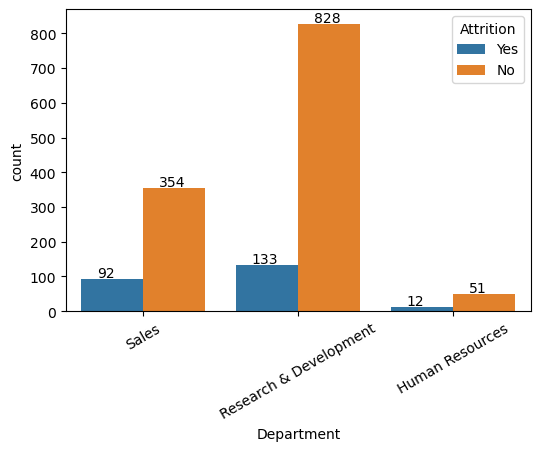

In [22]:
# Countplot for 
plt.figure(dpi=100)
plot = sns.countplot('Department',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Department.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. Almost 33% of employees working in Sales department departed
2. HR and R&D people are less likely to depart
3. Value Count for Each Department as
    - Research & Development =   961
    - Sales                   =  446
    - Human Resources          =  63

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


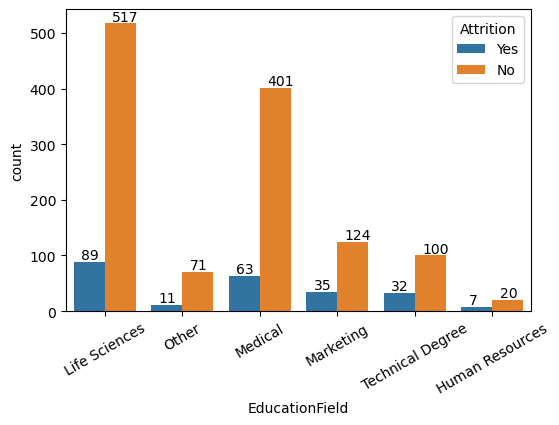

In [23]:
# Countplot for Education Field
plt.figure(dpi=100)
plot = sns.countplot('EducationField',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.EducationField.value_counts())
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. Most of the employees are from Life Sciences and Medical Field, Almost 1070
2. Attrition happens for almost every field. But fot Marketing, HR and Techinical Degree people probability seems higher.

Male      882
Female    588
Name: Gender, dtype: int64


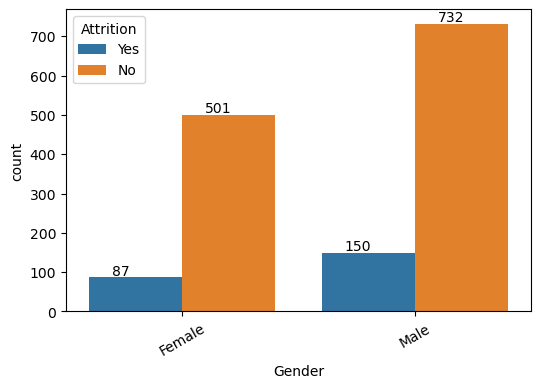

In [24]:
# Countplot for Gender
plt.figure(dpi=100)
plot = sns.countplot('Gender',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Gender.value_counts())
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

In [25]:
print(f'% of Mens affected by Attrition = {round((150/882)*100, 2)} %')
print(f'% of Females affected by Attrition = {round((87/588)*100, 2)} %')

% of Mens affected by Attrition = 17.01 %
% of Females affected by Attrition = 14.8 %


### Observation - 
Almost attrition rate is same for both mens and womens. There is slite difference but can be treated as same (Diff 2.8)
1. % of Mens Departed = 17.01 %
2. % of Females Departed = 14.8 %

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


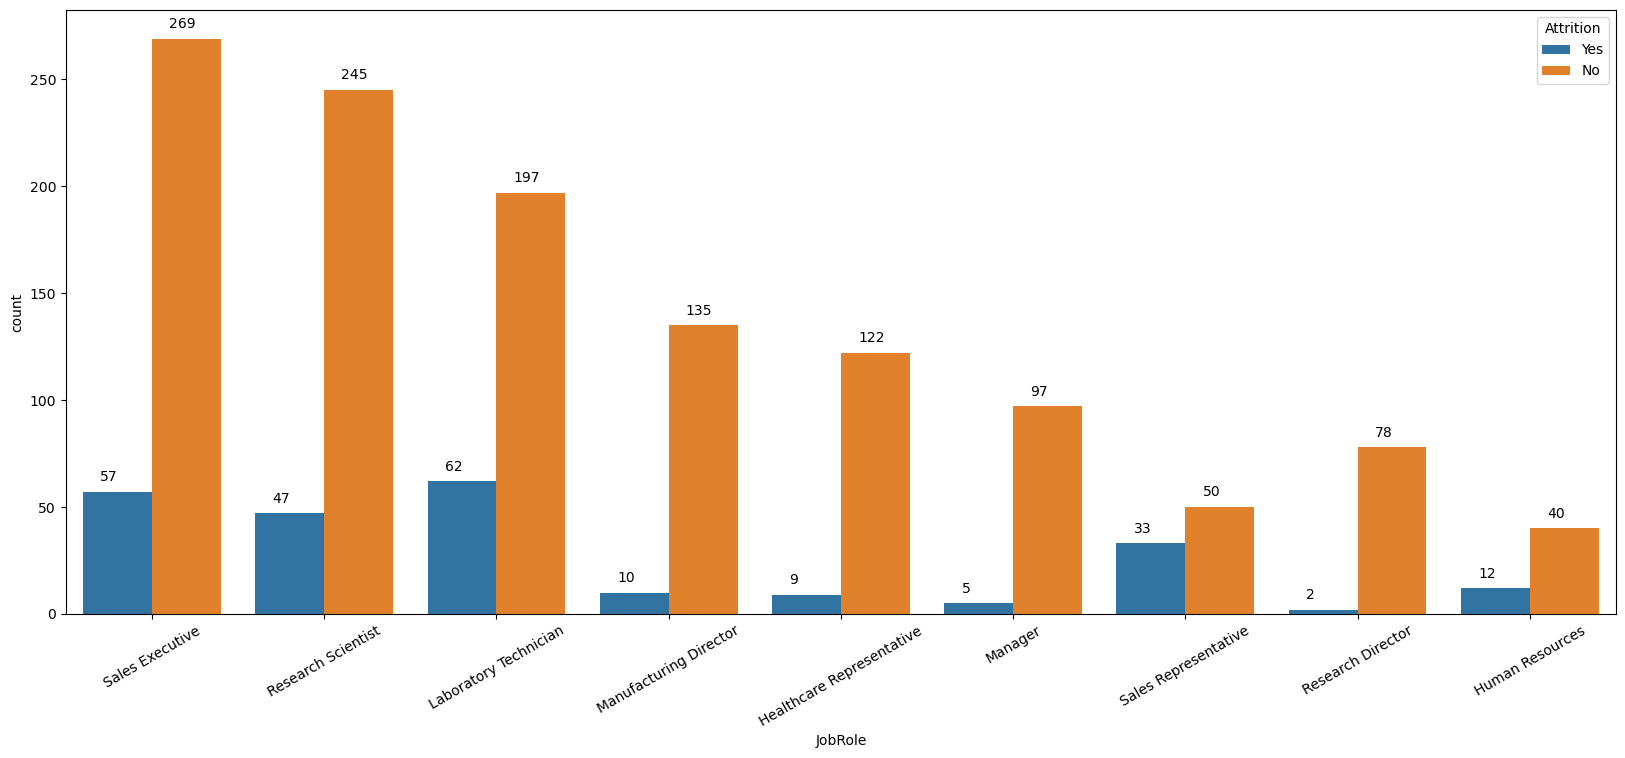

In [26]:
# Countplot for JobRole
plt.figure(dpi=100, figsize=(20, 8))
plot = sns.countplot('JobRole',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.JobRole.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. Lesser chance of departure - Managers, Sales Representative, Research Director, Healthcare Representative
2. Higher chance of departure - Research Scientist, Sales Executive, HR, Laboratory Techinician

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


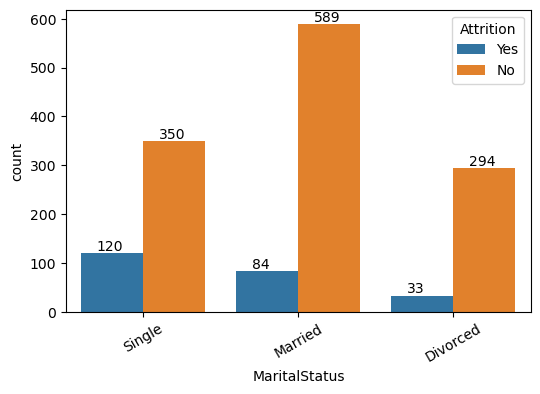

In [27]:
# Countplot for Marrital Status
plt.figure(dpi=100)
plot = sns.countplot('MaritalStatus',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.MaritalStatus.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Chances of facing attrition is more for singles
1. 25% of singles has departed
2. Only 12% of married people opted departure from current organisation
3. Only 10% of Divorsed people opted departure from current organisation

No     1054
Yes     416
Name: OverTime, dtype: int64


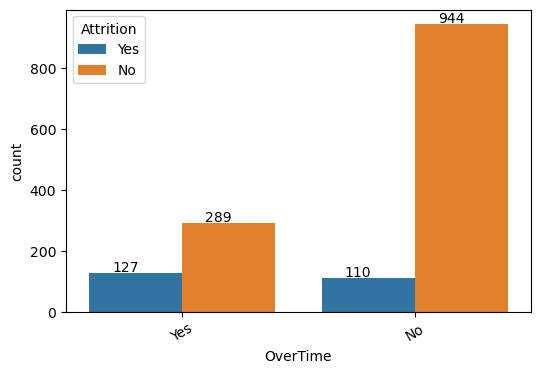

In [28]:
# Countplot for OverTime
plt.figure(dpi=100)
plot = sns.countplot('OverTime',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.OverTime.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. 30% of employees doing over time has more chances of leaving company
2. Out of rest of the emplyees only 10% of employees left company

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


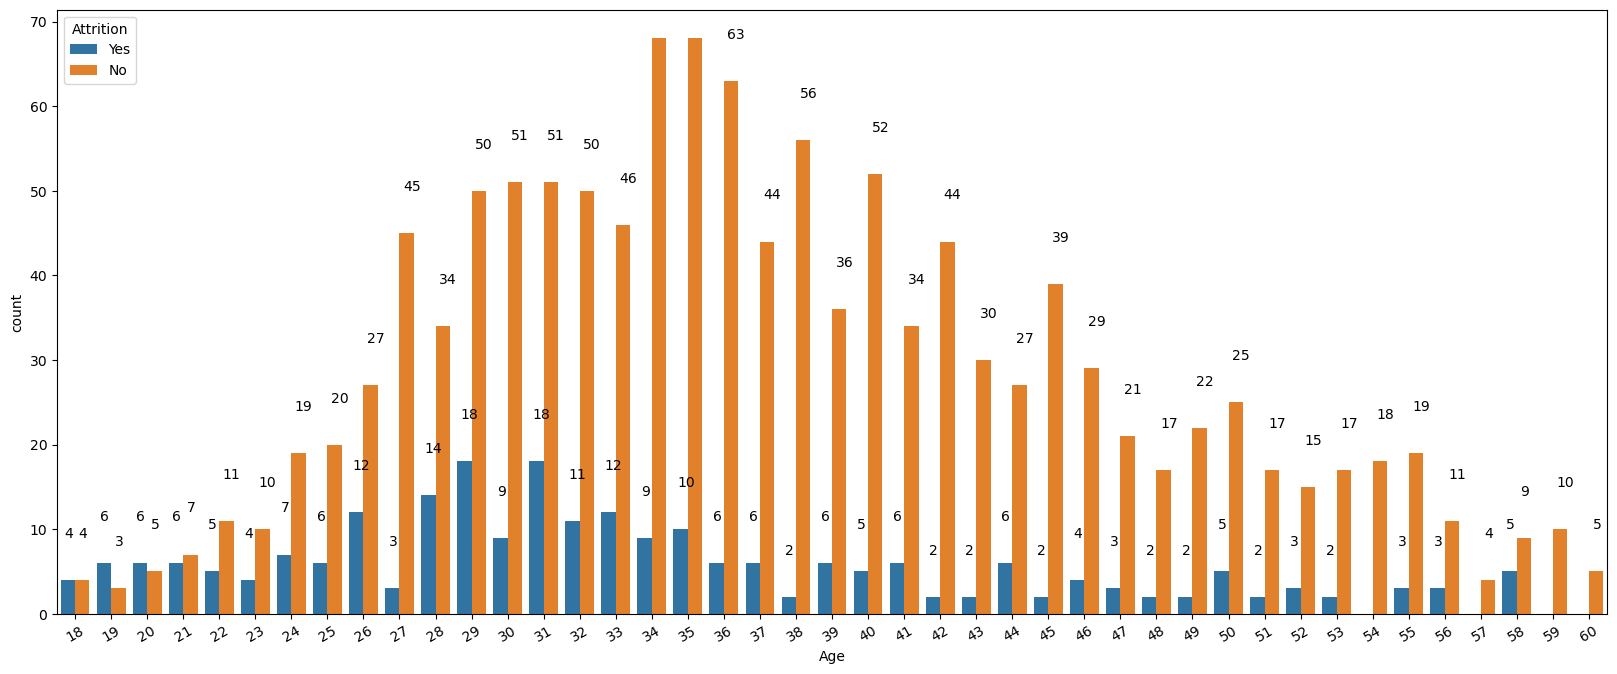

In [29]:
# Countplot for OverTime
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('Age',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Age.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. Employees with age ranging from 18-21 has 50% of chance of departing
2. Employees with age ranging from 22-32 has 20-25% of chance of departing
3. As Age of employee increases, chances of departing decresed

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


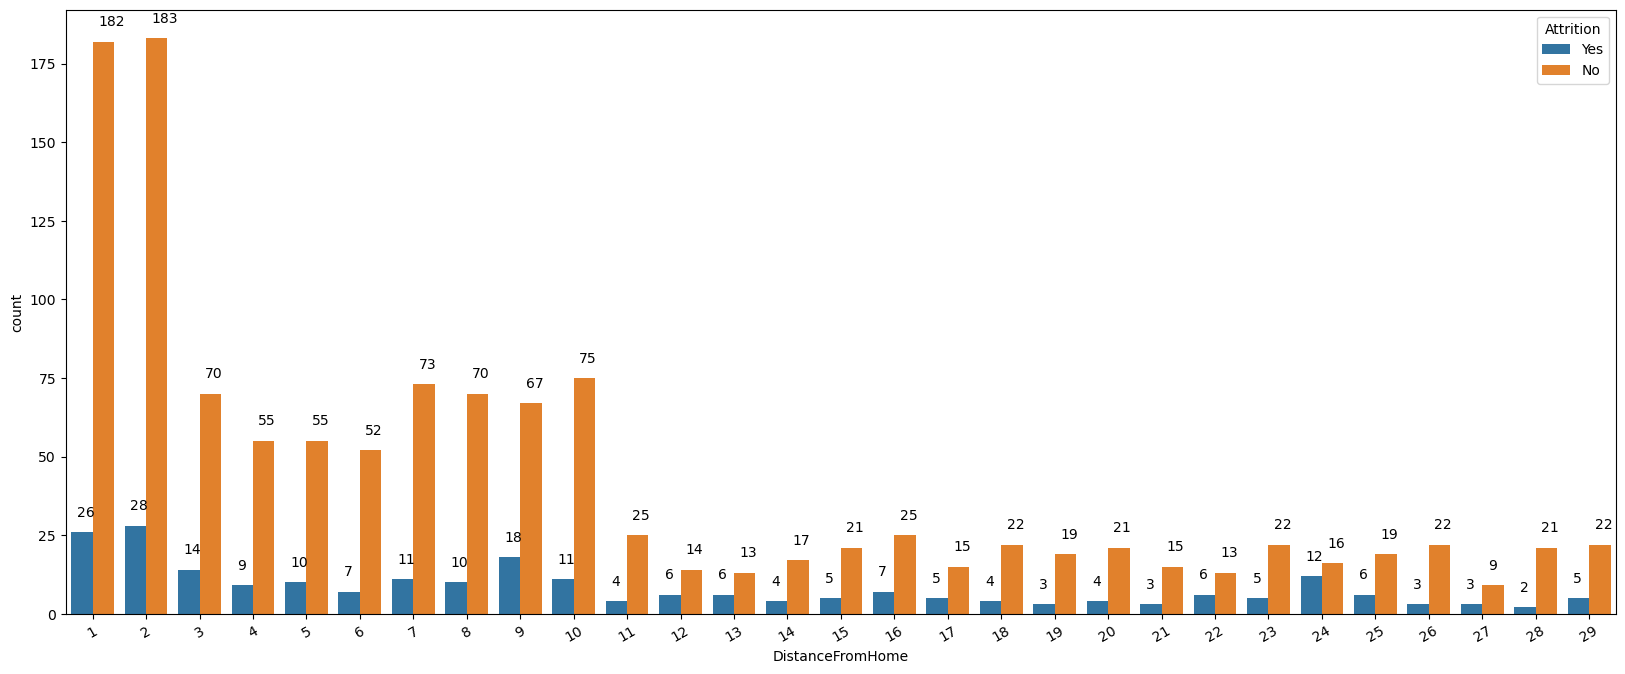

In [30]:
# Countplot for DistanceFromHome
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('DistanceFromHome',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.DistanceFromHome.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. It seems no effect of distance on attrition, as % of getting attrition is ranging between 10-20 % for all. We can drop this colums.

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


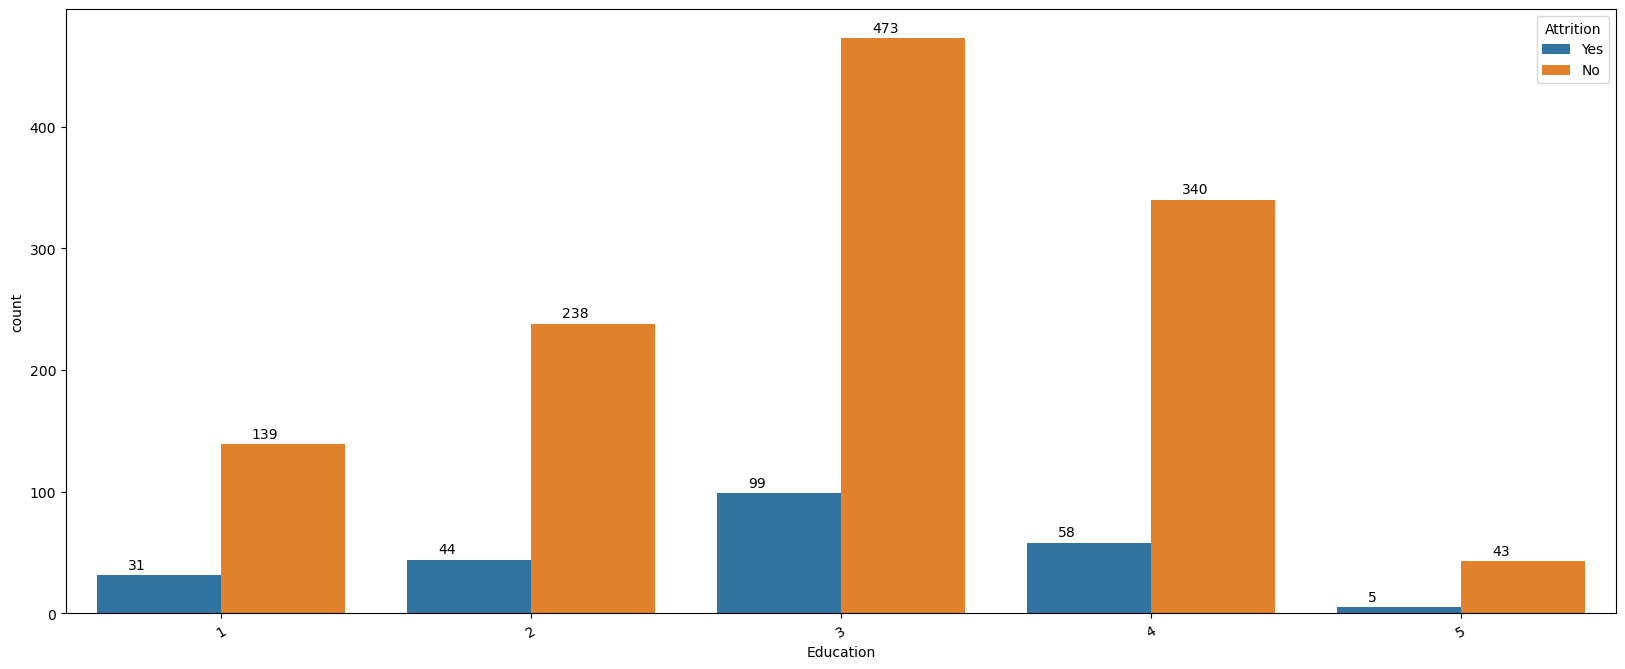

In [31]:
# Countplot for Education
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('Education',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Education.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. It seems no effect of education on attrition, as % of getting attrition is ranging between 10-20 % for all. We can drop this colums.

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


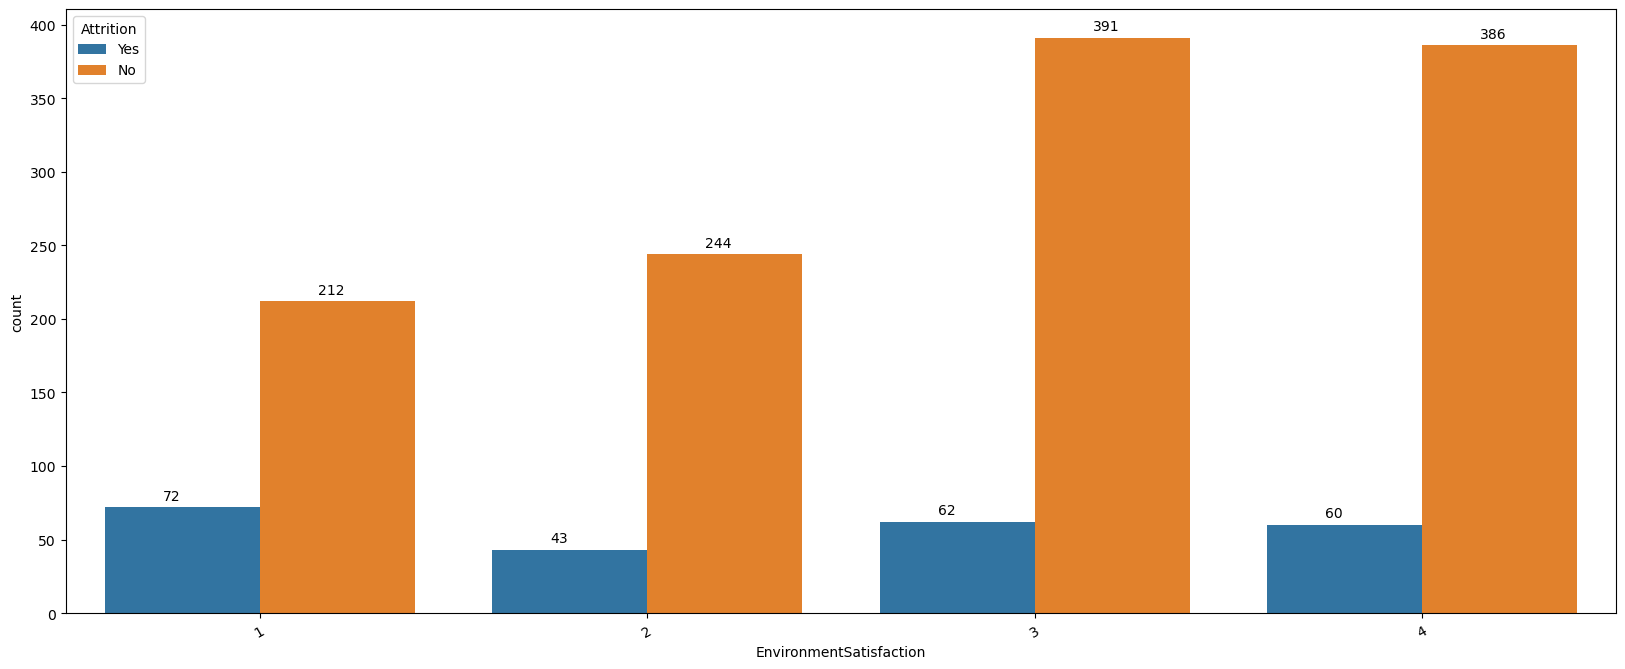

In [32]:
# Countplot for EnvironmentSatisfaction
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('EnvironmentSatisfaction',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.EnvironmentSatisfaction.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))

### Observation - 
1. Employees having 1 EnvironmentSatisfaction are more likely to leave company

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


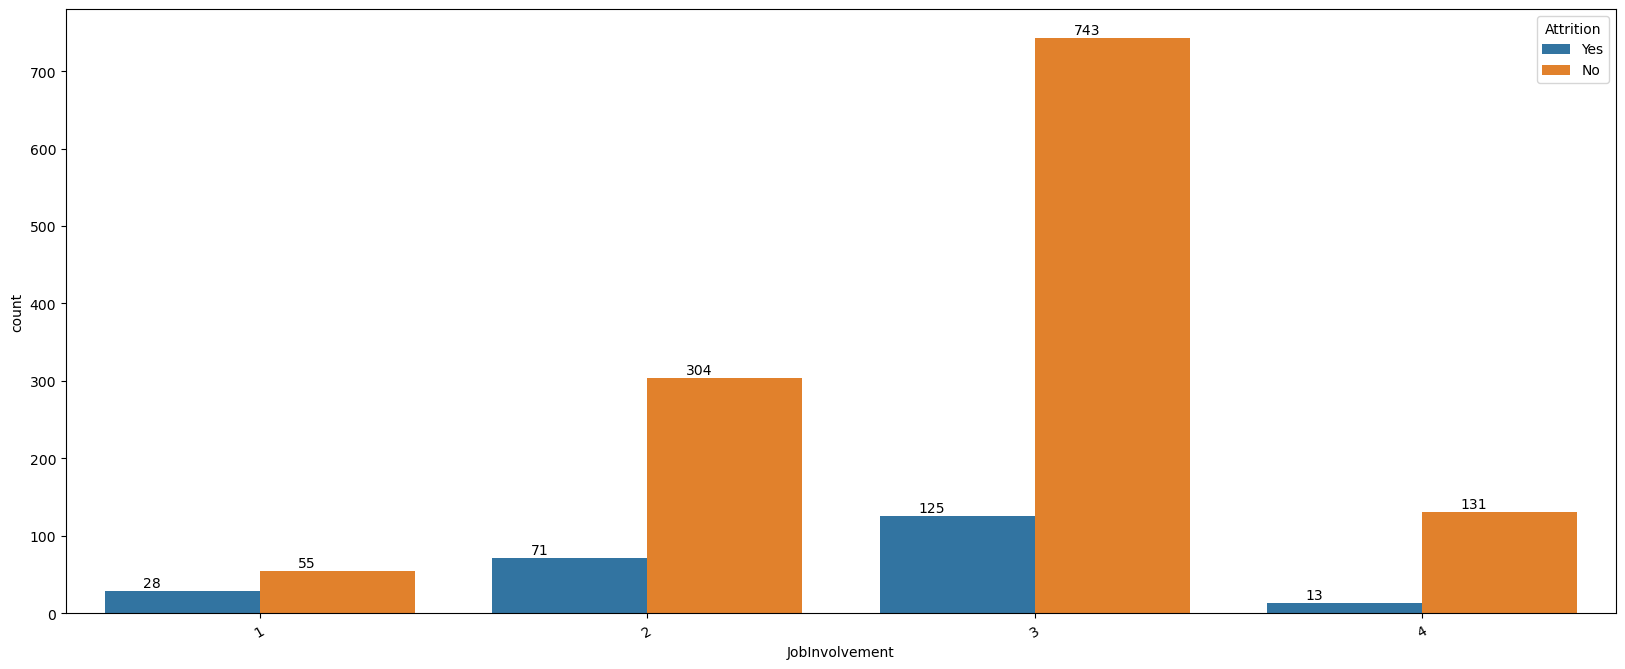

In [33]:
# Countplot for JobInvolvement
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('JobInvolvement',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.JobInvolvement.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. With JobInvolment=1, 33% Chance of leaving company
2. With JobInvolment=2, 18% Chance of leaving company
3. With JobInvolment=3, 15% Chance of leaving company
4. With JobInvolment=4, 8% Chance of leaving company

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


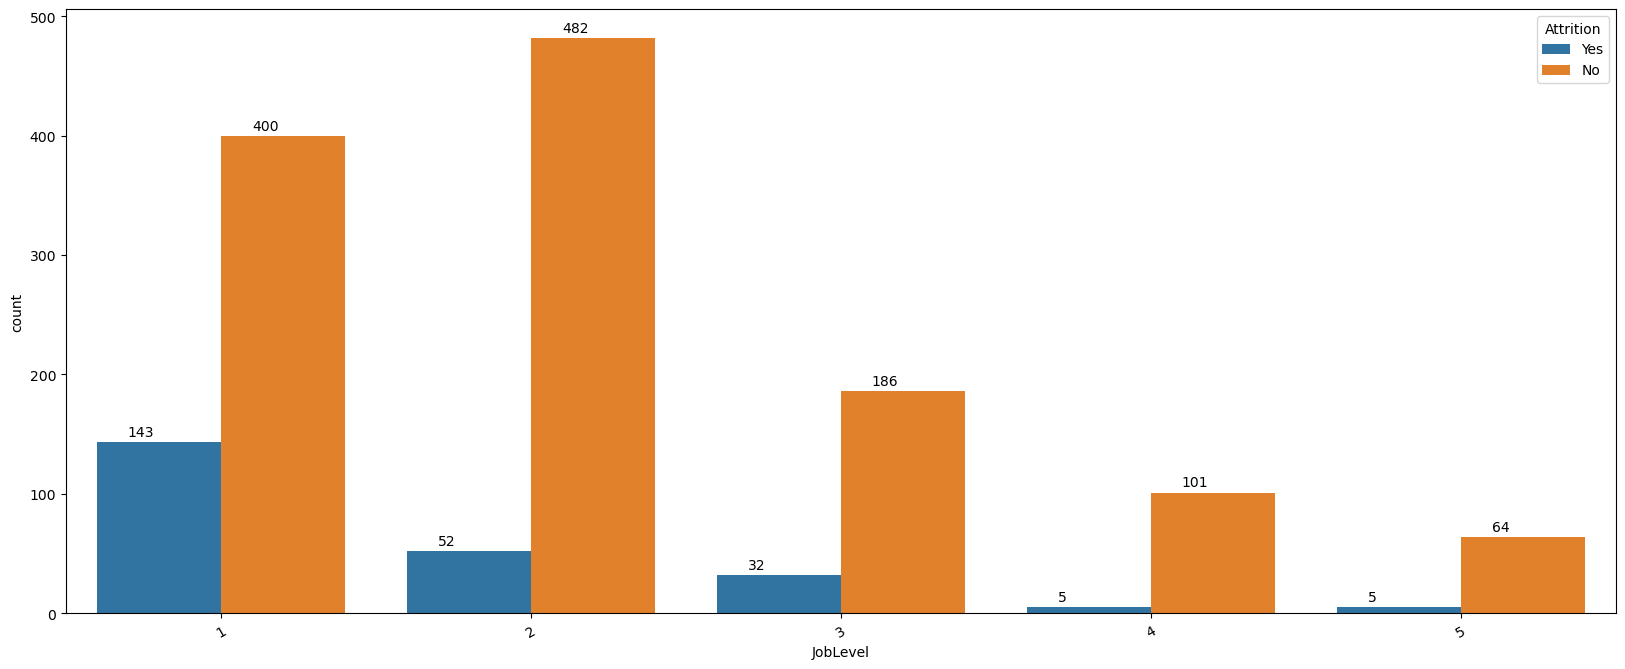

In [34]:
# Countplot for JobLevel
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('JobLevel',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.JobLevel.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation -
For jobLevel = 1, chances employee leaving company are more around 25 %

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


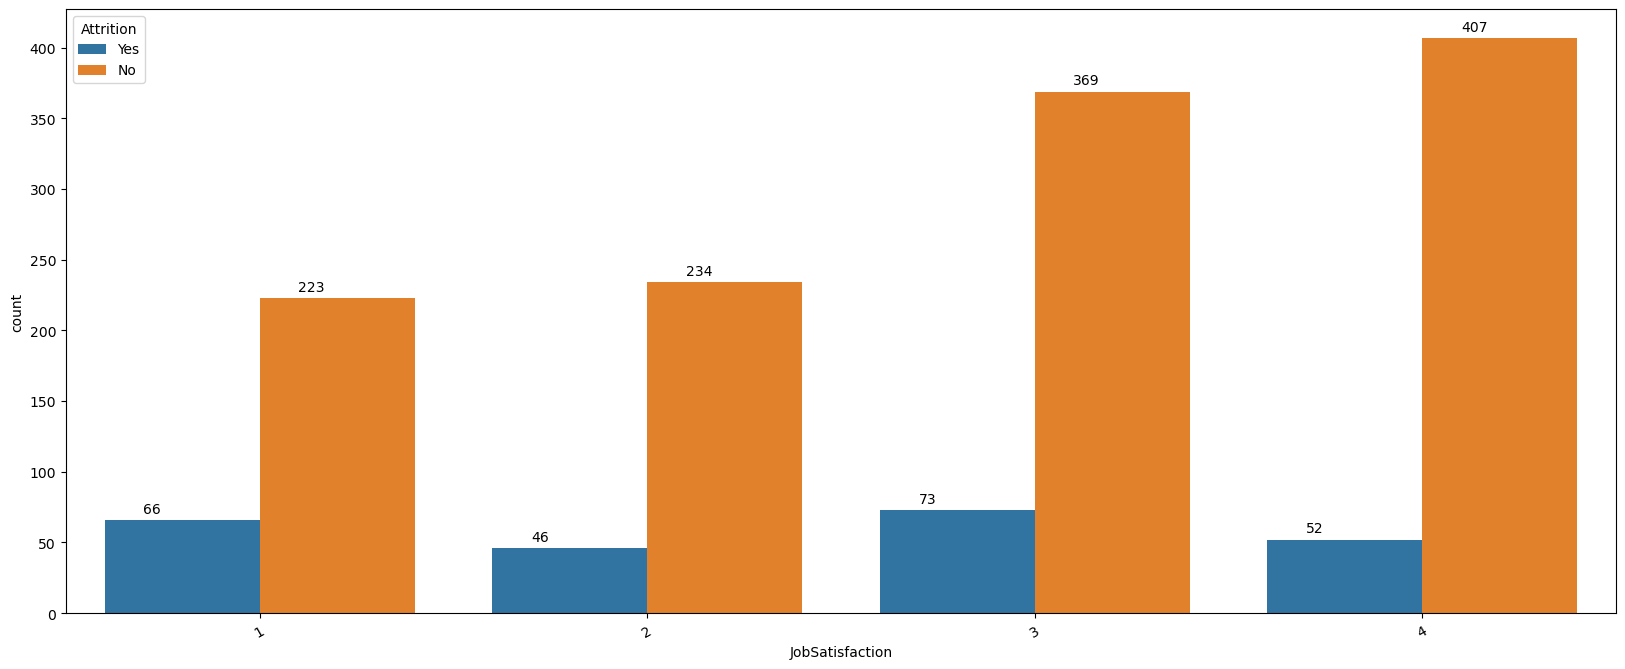

In [35]:
# Countplot for JobSatisfaction
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('JobSatisfaction',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.JobSatisfaction.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Employees with less satisfaction level are more likely to depart in another organisation

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


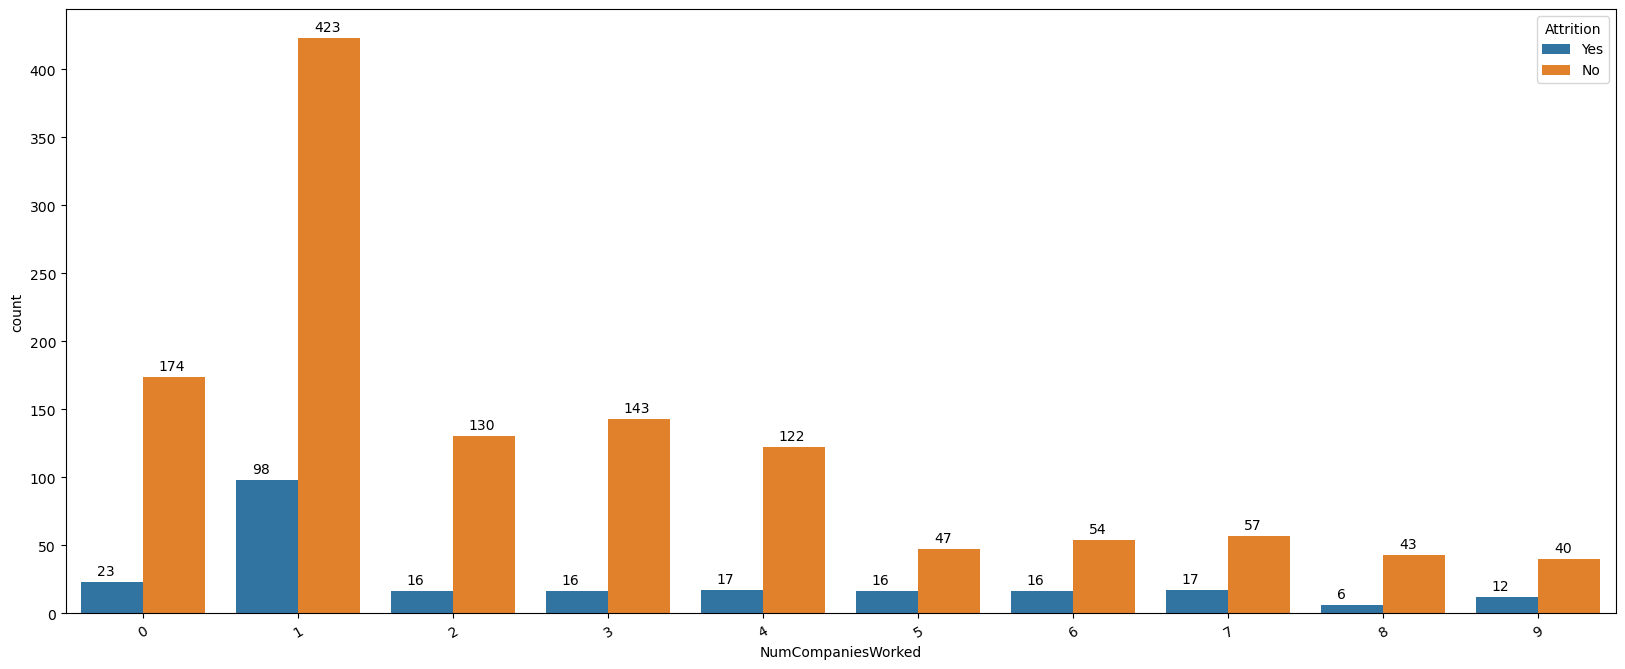

In [36]:
# Countplot for NumCompaniesWorked
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('NumCompaniesWorked',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.NumCompaniesWorked.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. Employees who worked in more companies are more likely to depart
2. Employees with less worked comapnies has low chance of leaving comapny

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


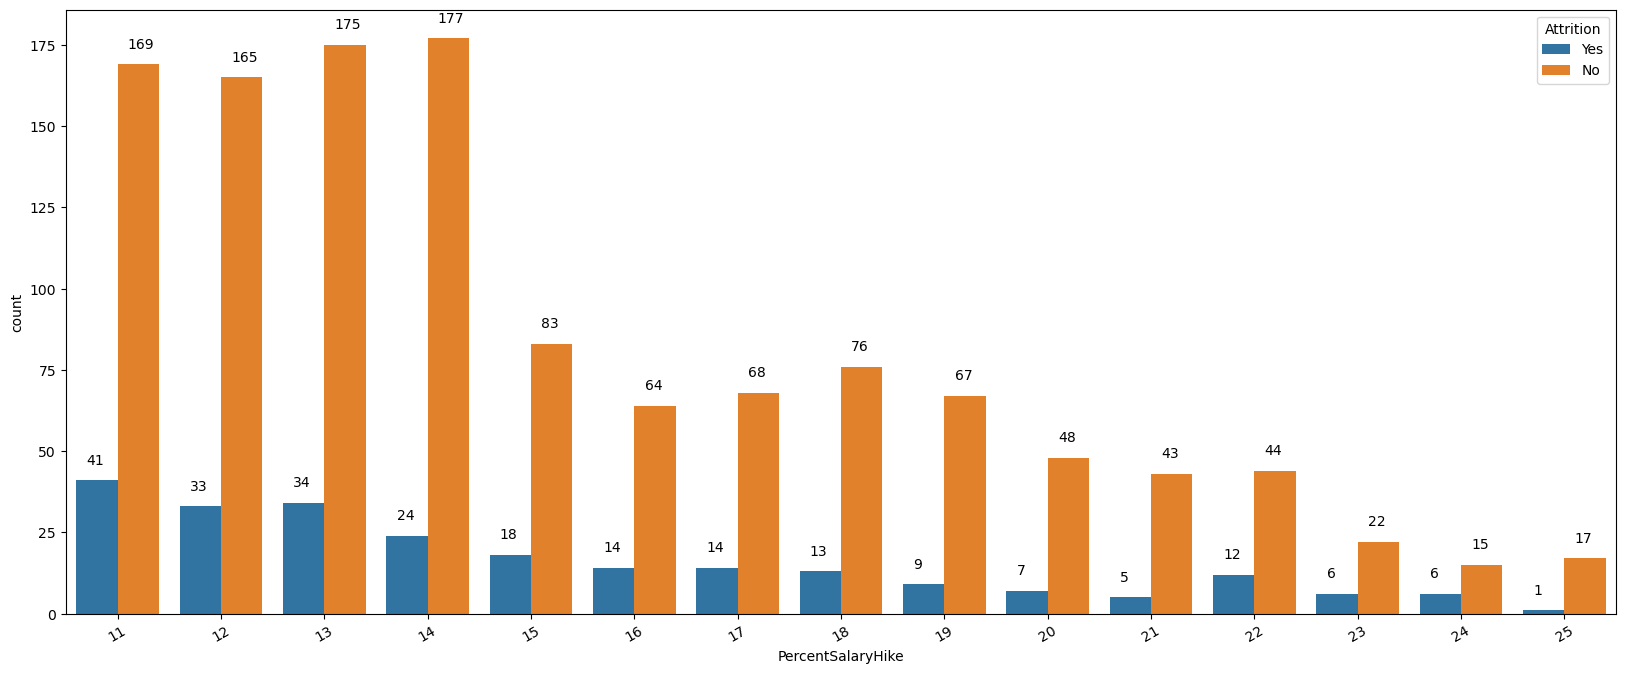

In [37]:
# Countplot for PercentSalaryHike
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('PercentSalaryHike',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.PercentSalaryHike.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observations - 
- It is difficult to establish relationship based only on % hike, because employees with high salary hike also more tends to leave company (Around 25% chance).
- Also employees with % hike 11-15 are more likely to leave company (15% Chance)

3    1244
4     226
Name: PerformanceRating, dtype: int64


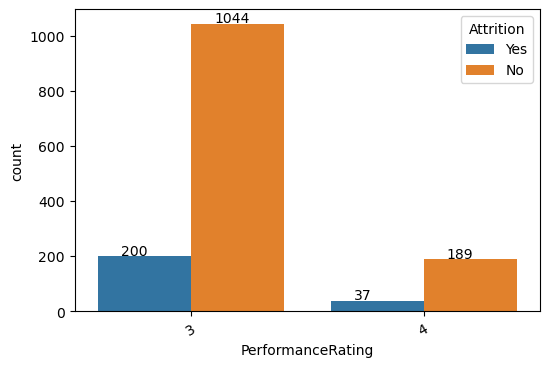

In [38]:
# Countplot for PerformanceRating
plt.figure(dpi=100)
plot = sns.countplot('PerformanceRating',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.PerformanceRating.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Both ratings has almost same departing %

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


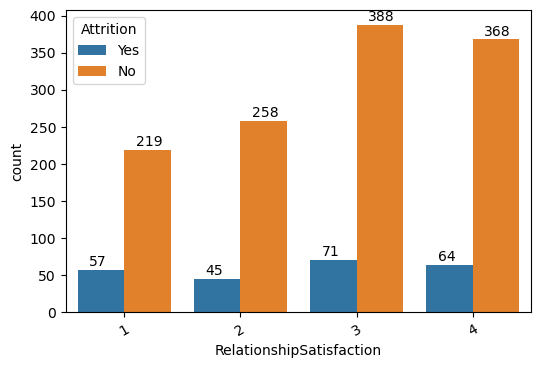

In [39]:
# Countplot for RelationshipSatisfaction
plt.figure(dpi=100)
plot = sns.countplot('RelationshipSatisfaction',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.RelationshipSatisfaction.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Employees with more RelationshipSatisfaction are more likely to stay

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


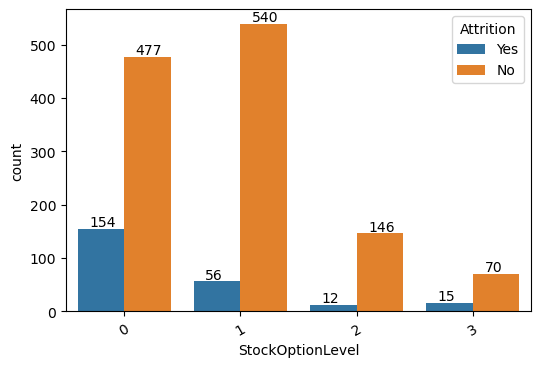

In [40]:
# Countplot for StockOptionLevel
plt.figure(dpi=100)
plot = sns.countplot('StockOptionLevel',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.StockOptionLevel.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Employess with more StockOptionLevel are more likely to stay in organisation

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64


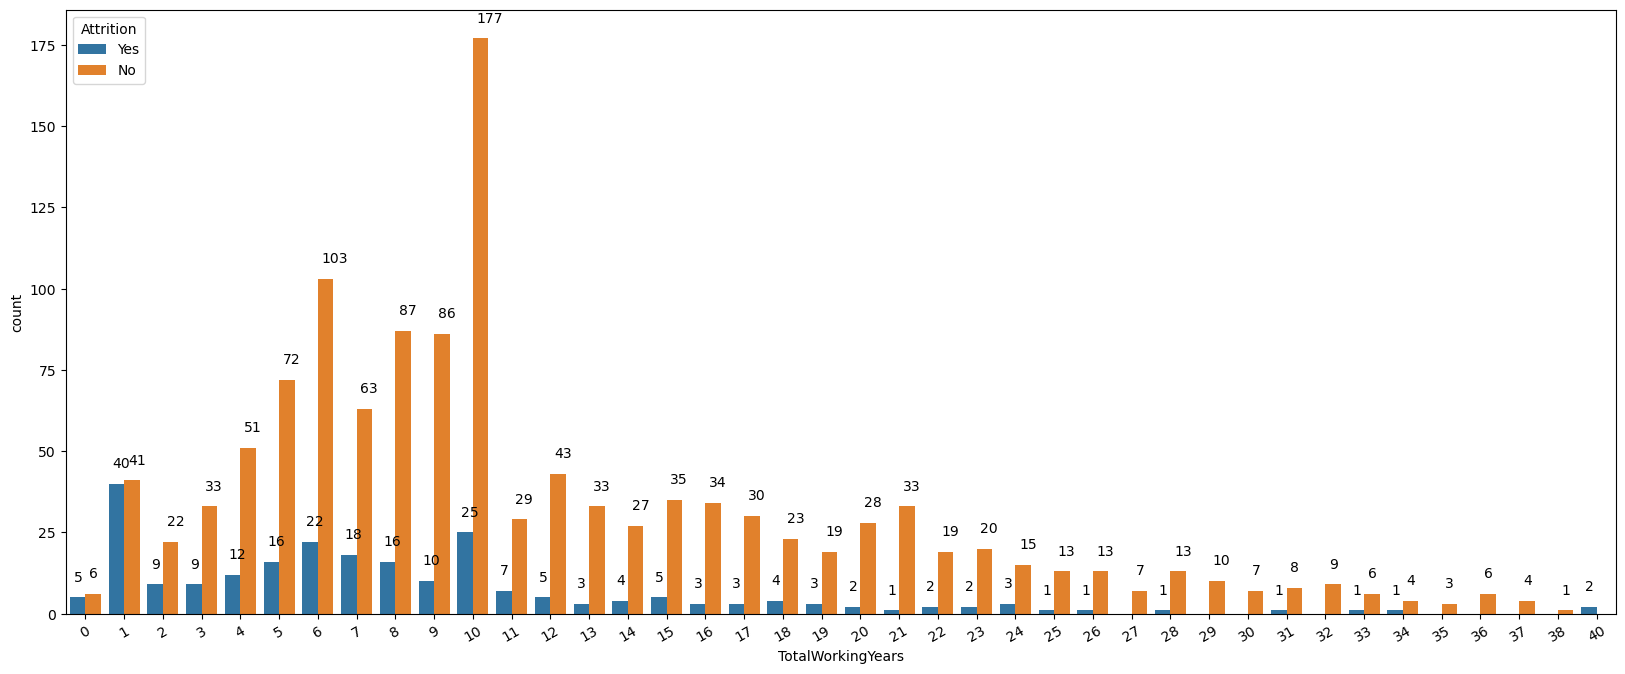

In [41]:
# Countplot for TotalWorkingYears
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('TotalWorkingYears',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.TotalWorkingYears.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Employees with total working years ranging between 0-10 are more likely to leave company

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


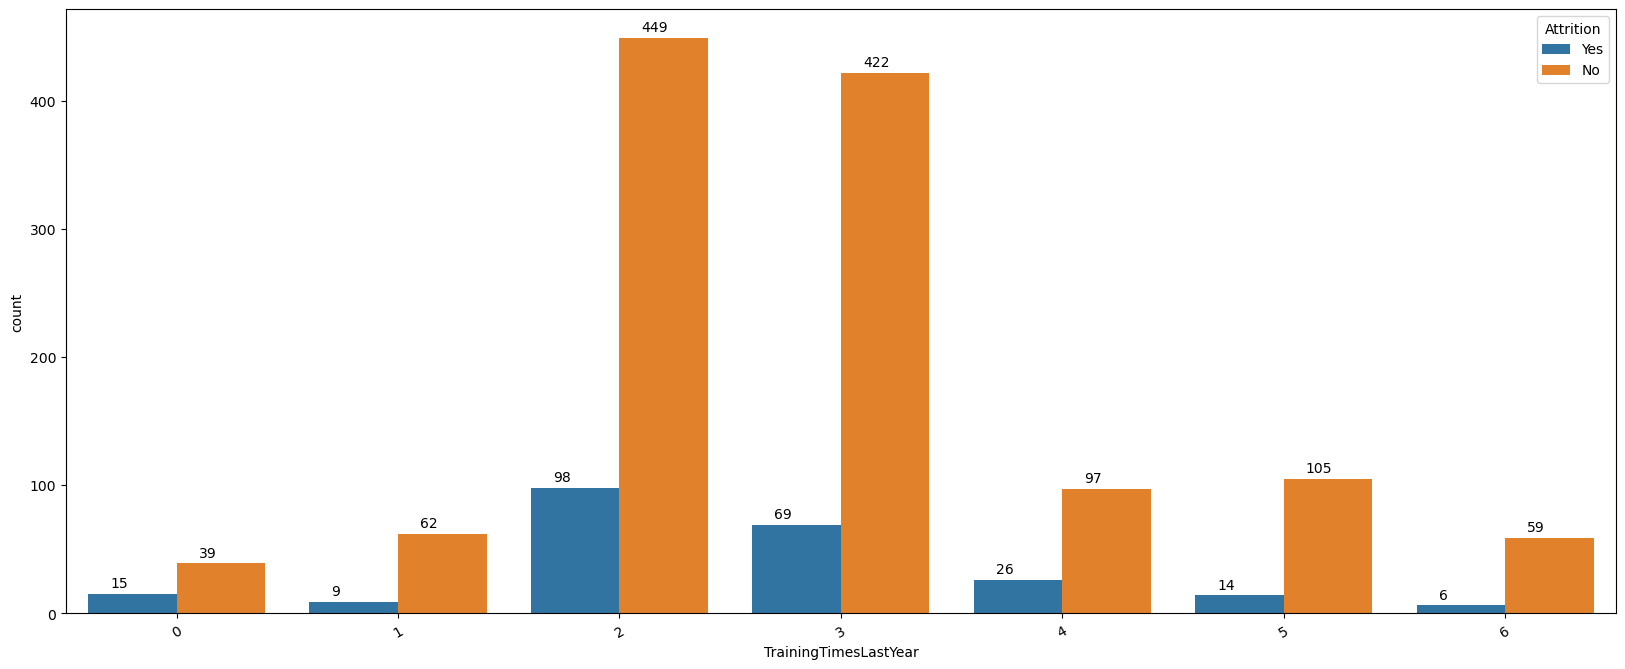

In [42]:
# Countplot for TrainingTimesLastYear
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('TrainingTimesLastYear',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.TrainingTimesLastYear.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


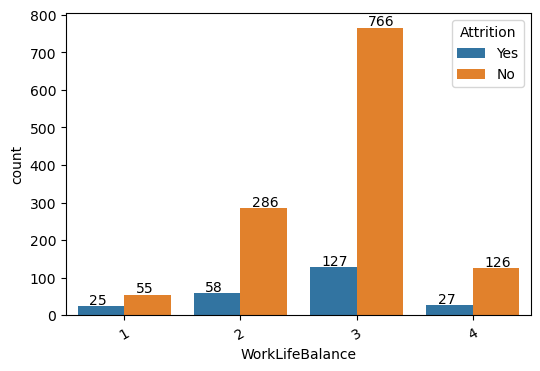

In [43]:
# Countplot for WorkLifeBalance
plt.figure(dpi=100)
plot = sns.countplot('WorkLifeBalance',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.WorkLifeBalance.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64


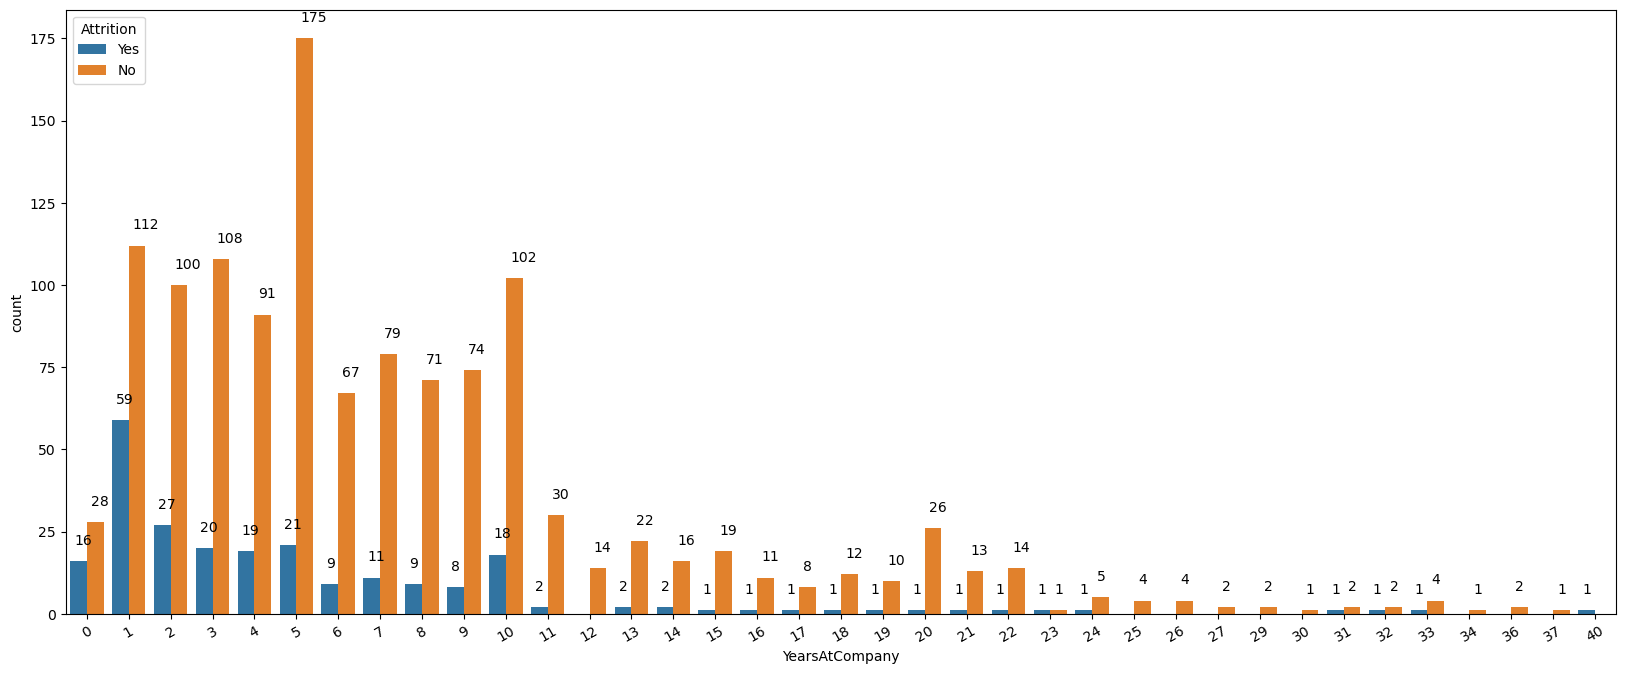

In [44]:
# Countplot for YearsAtCompany
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('YearsAtCompany',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.YearsAtCompany.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


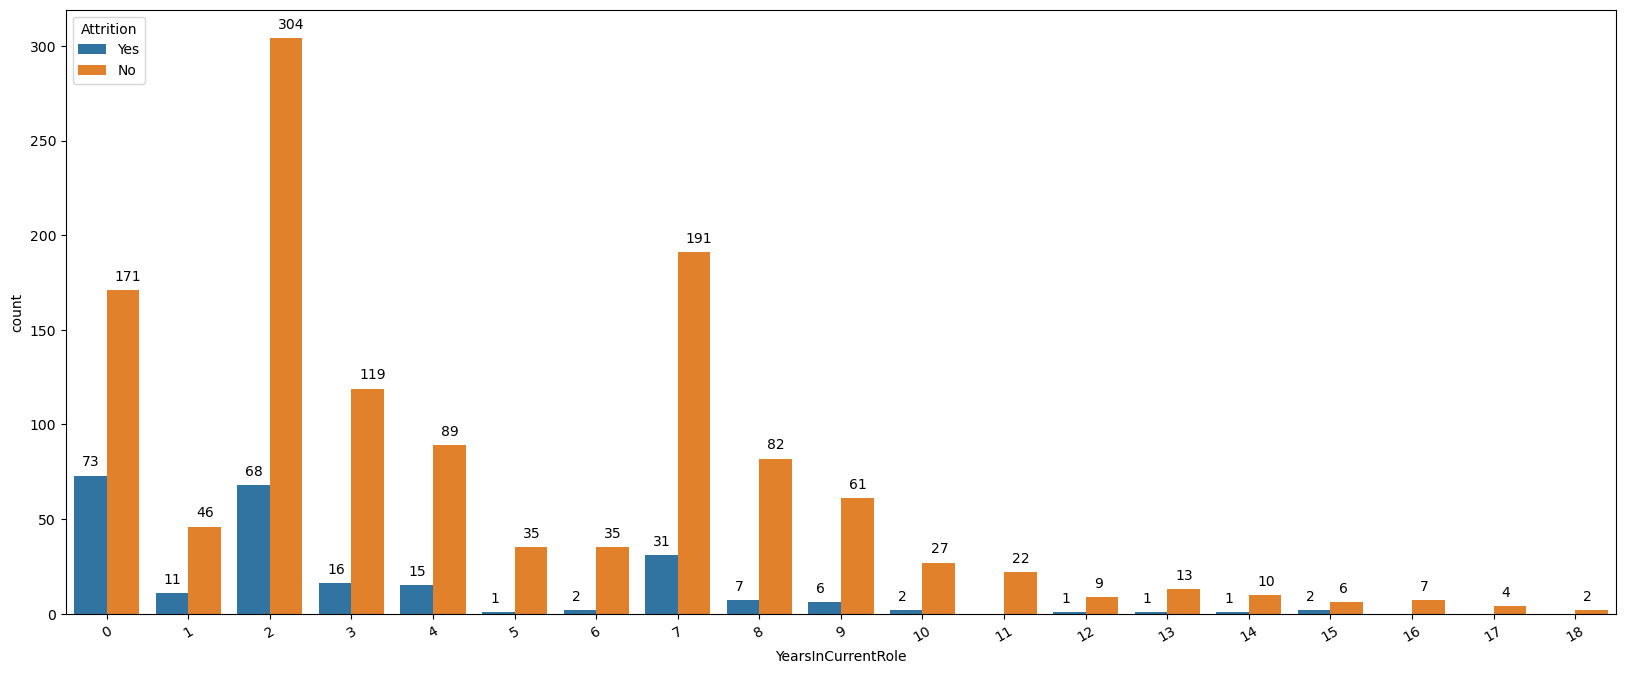

In [45]:
# Countplot for YearsInCurrentRole
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('YearsInCurrentRole',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.YearsInCurrentRole.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


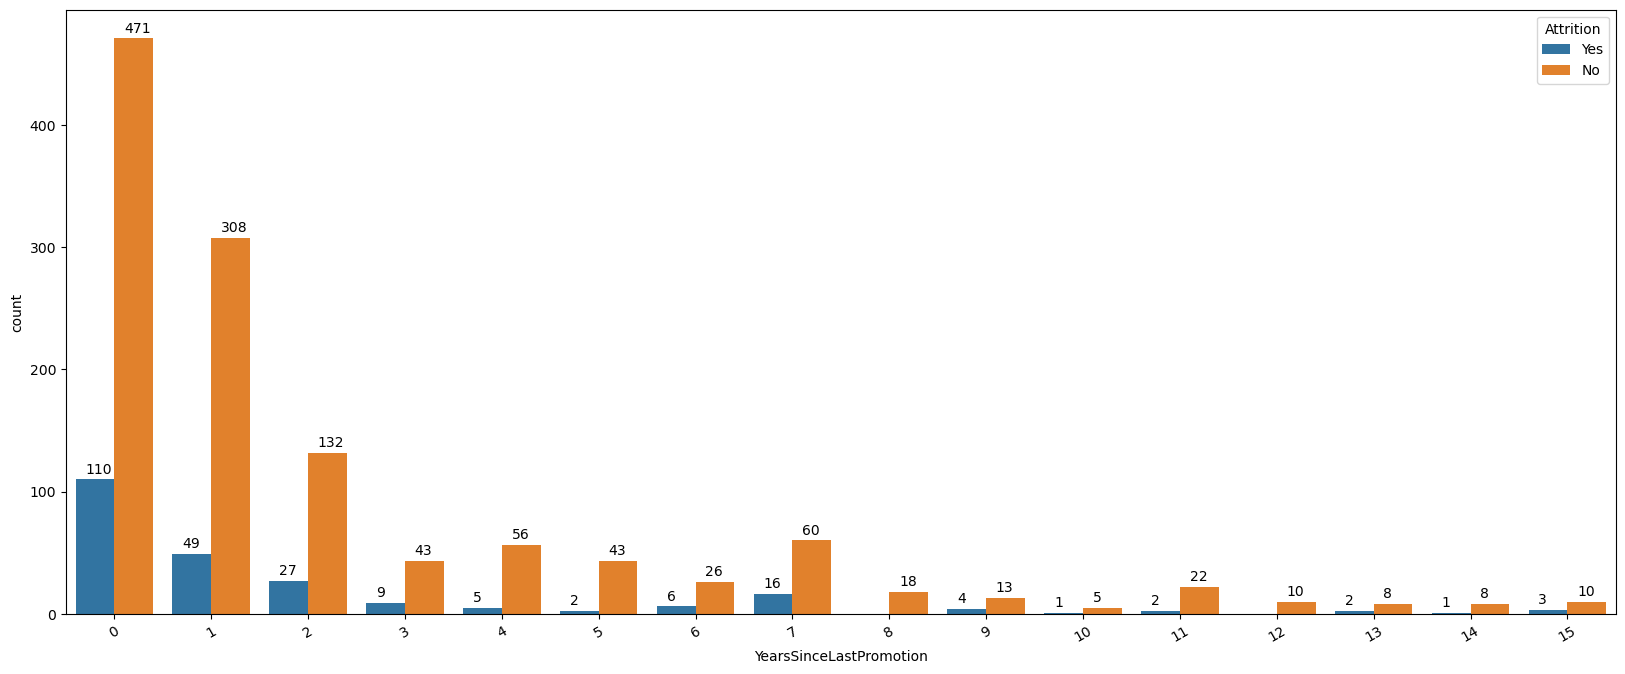

In [46]:
# Countplot for YearsSinceLastPromotion
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('YearsSinceLastPromotion',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.YearsSinceLastPromotion.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64


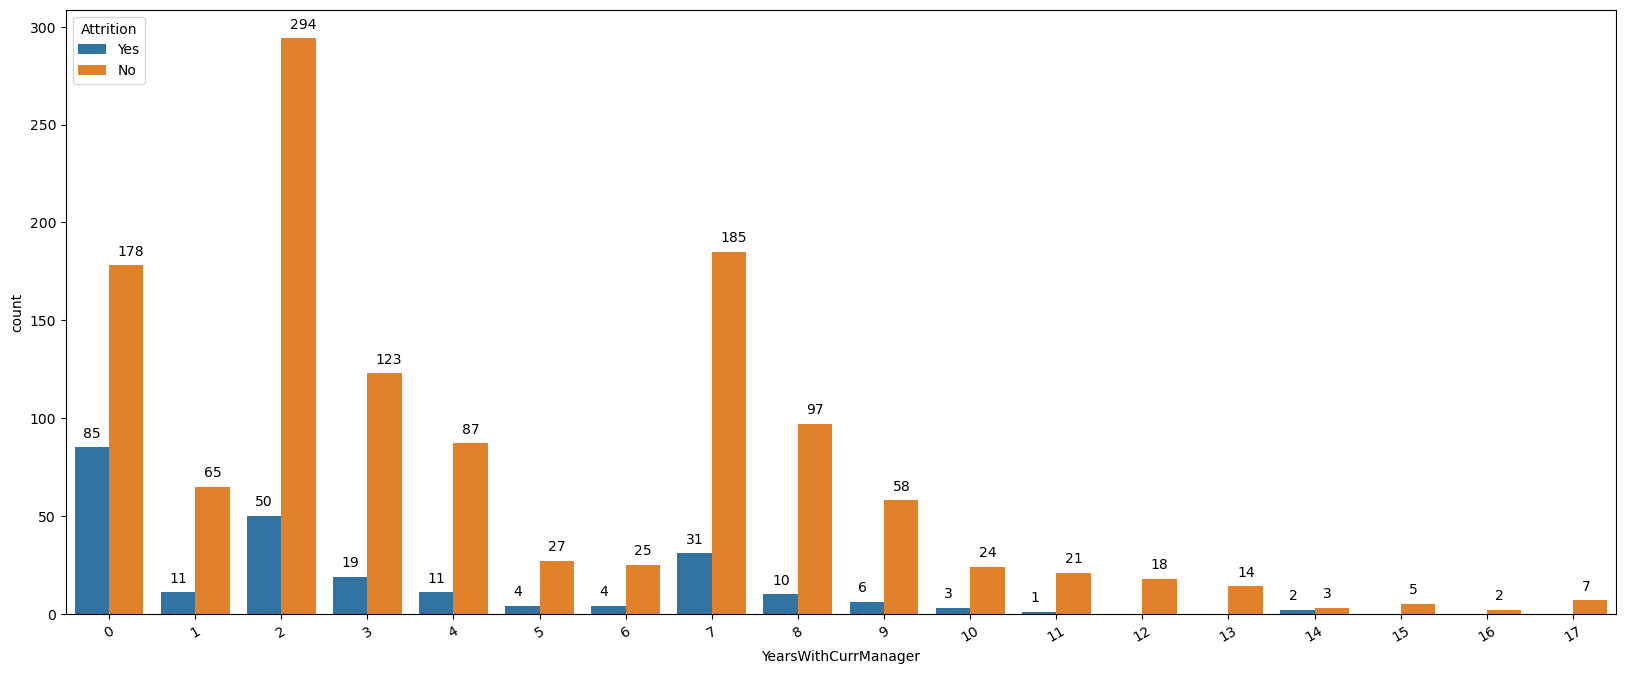

In [47]:
# Countplot for YearsWithCurrManager
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('YearsWithCurrManager',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.YearsWithCurrManager.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. TrainingTimesLastYear
    - Employees getting training 2-3 times in year
    - TrainingTimes dosent affect departing status, as it is same for all categories
2. WorkLifeBalance
    - Employees with 1 work life balance are more likely to leave company
3. YearsAtCompany
    - Employees with 0-10 years at company are more likely to leave company.
4. YearsInCurrentRole
    - Employees with more years in current role are less likely to leave company
5. YearsSinceLastPromotion
    - Employees leaving early after 1,2,3 promotion
6. YearsWithCurrManager
    - More employees tend to leaver company after working for 1-2 years

# Checking Unique Values from Data Set

In [48]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

### Observation 
1. 'EmployeeCount', 'Over18' and 'StandardHours' have only one unique values
2. 'EmployeeNumber' has 1470 unique values

Above feature aren't playing important role, so considering dropping them

In [49]:
df.drop()

<bound method DataFrame.drop of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

# ------------------------------------ Handling Outliers ----------------------------------------------

Age                            AxesSubplot(0.125,0.787927;0.168478x0.0920732)
DailyRate                   AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
DistanceFromHome            AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Education                   AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
EmployeeCount                  AxesSubplot(0.125,0.677439;0.168478x0.0920732)
EmployeeNumber              AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
HourlyRate                  AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
JobInvolvement                 AxesSubplot(0.125,0.566951;0.168478x0.0920732)
JobLevel                    AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
JobSatisfaction             AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
MonthlyIncome               AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
MonthlyRate                    AxesSubplot(0.125,0.456463;0.1684

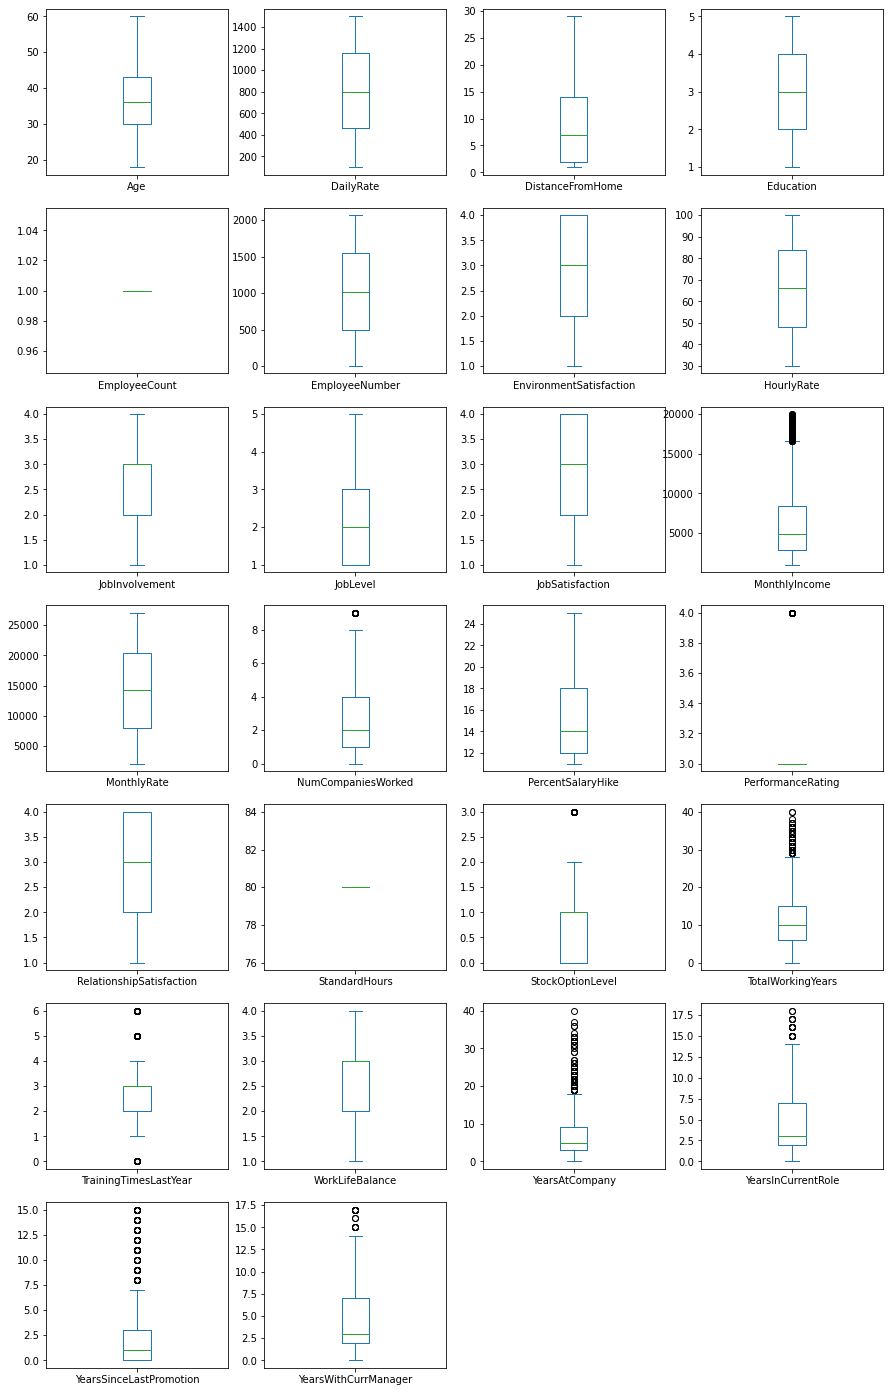

In [50]:
df.plot(kind='box',subplots=True,figsize=(15,25),layout=(7,4))
# plotting individual graph for better understanding of graph

### Observation - 
Outliers present in 
   - MonthlyIncome
   - NewCompaniesWorked
   - PerformanceRating
   - TotalWorkingYears
   - TrainingTimesLastYear
   - YearsAtCompany
   - YearsInCurrentRole
   - YearsSinceLastPromotion
   - YearsWithCurrManager

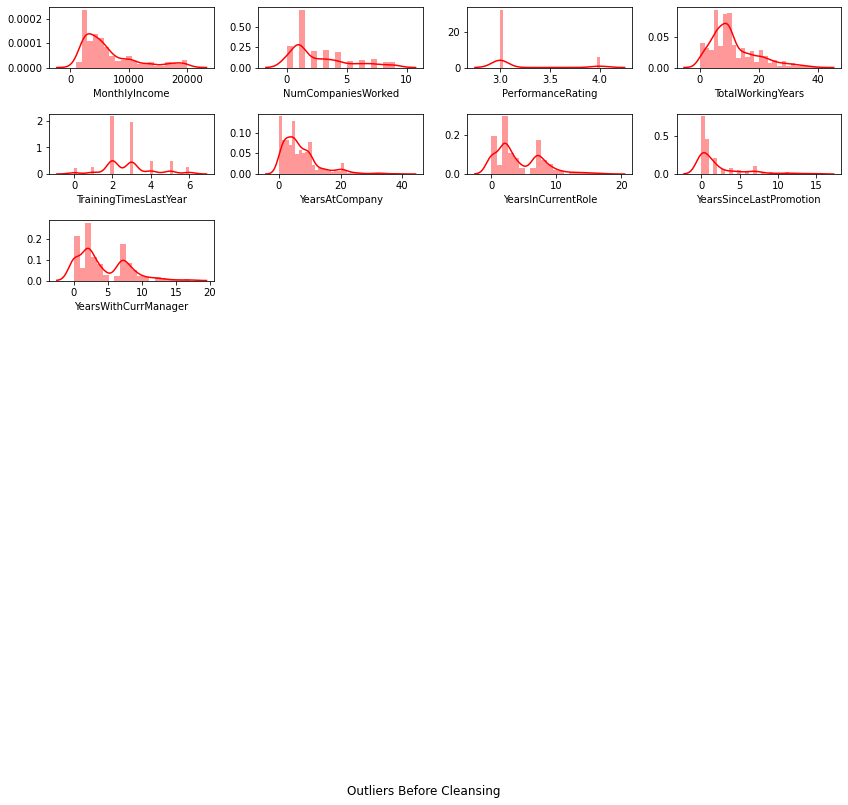

In [60]:
plt.figure(figsize = (12, 12))
for i in range(0, len(cols_with_outliers)):
    plt.subplot(8, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

plt.suptitle('Outliers Before Cleansing', y = 0.05)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-hist.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-hist.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

In [55]:
df2 = df.copy()

In [58]:
cols_with_outliers = ['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [59]:
for feature in cols_with_outliers:
    IQR = df2[feature].quantile(0.75) - df2[feature].quantile(0.25)
    upper_bond = df2[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df2[feature].quantile(0.25) - (IQR * 1.5)
    
    df2[feature] = np.where(df2[feature]>upper_bond,upper_bond,df2[feature])
    df2[feature] = np.where(df2[feature]<lower_bond,lower_bond,df2[feature])

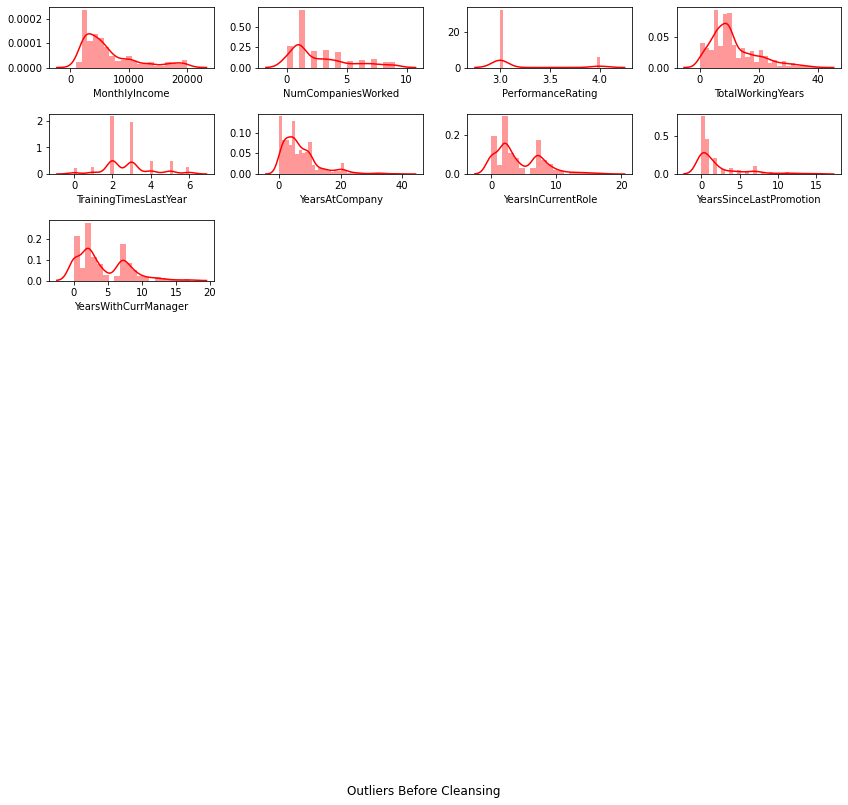

In [61]:
plt.figure(figsize = (12, 12))
for i in range(0, len(cols_with_outliers)):
    plt.subplot(8, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

plt.suptitle('Outliers Before Cleansing', y = 0.05)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-hist.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-hist.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

Age                            AxesSubplot(0.125,0.787927;0.168478x0.0920732)
DailyRate                   AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
DistanceFromHome            AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Education                   AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
EmployeeCount                  AxesSubplot(0.125,0.677439;0.168478x0.0920732)
EmployeeNumber              AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
HourlyRate                  AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
JobInvolvement                 AxesSubplot(0.125,0.566951;0.168478x0.0920732)
JobLevel                    AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
JobSatisfaction             AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
MonthlyIncome               AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
MonthlyRate                    AxesSubplot(0.125,0.456463;0.1684

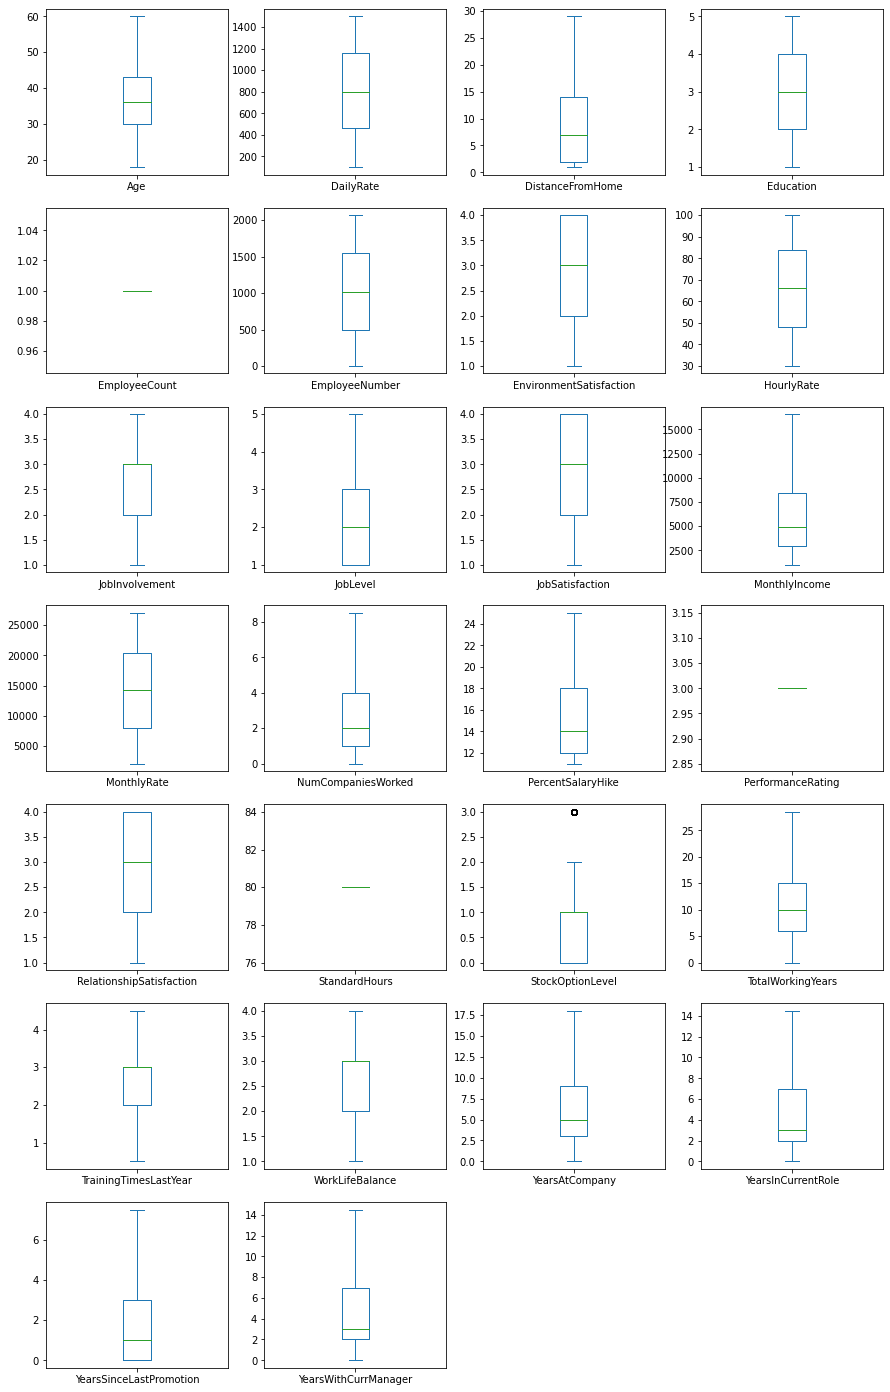

In [62]:
df2.plot(kind='box',subplots=True,figsize=(15,25),layout=(7,4))
# plotting individual graph for better understanding of graph

In [64]:
df2.shape

(1470, 35)

### Observation - 
Based on Previous Observation, We can drop EmployeeCount, StandardHours, EmployeeNumber

In [67]:
df2.drop('EmployeeCount',axis=1,inplace=True)
df2.drop('StandardHours',axis=1,inplace=True)
df2.drop('EmployeeNumber',axis=1,inplace=True)
df2.drop('Over18',axis=1,inplace=True)

KeyError: "['EmployeeCount'] not found in axis"

In [69]:
df2.shape

(1470, 31)

# Checking correlation

In [71]:
# Changing binary representation of our target variable to 1/0
df2.Attrition = df2.Attrition.map({'Yes':1, 'No':0})

<AxesSubplot:>

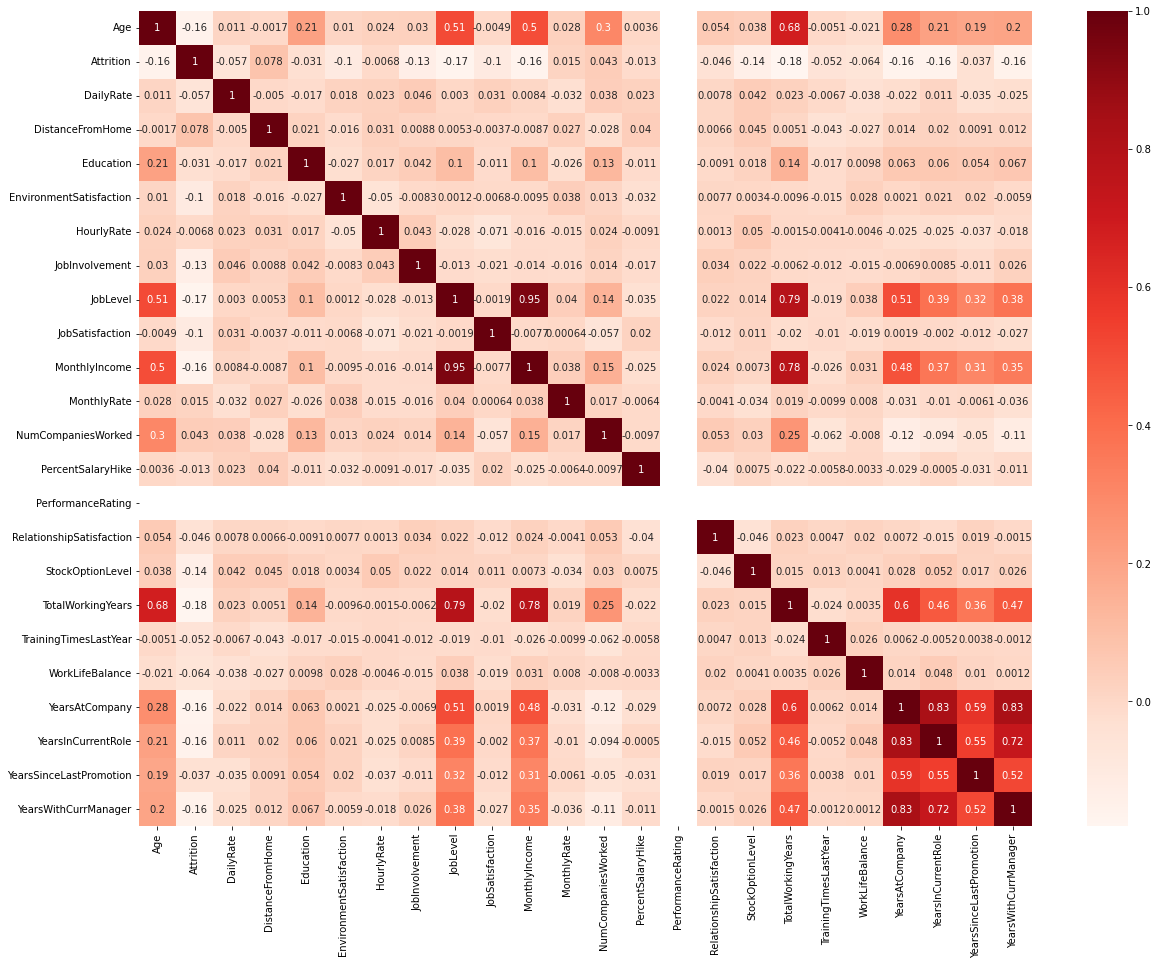

In [74]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(),cmap='Reds',annot=True)

### Observation - 
- PercentSalaryHike and PerformanceRating have a fairly strong positive relationship
- TotalWorkingYears has a fairly strong positive relationship with Age, MonthlyIncome, and JobLevel
- YearsAtCompany has a fairly strong positive relationship with YearsInCurrentRole and YearsWithCurrManager

In [80]:
# numerik diskret (D) = variabel angka berupa sejumlah nilai yang terisolasi (diperoleh dari perhitungan)
num_d = [
    'DailyRate',
    'EmployeeCount', # 1
    'HourlyRate',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike', # percentage
    'StandardHours', # 1
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]
# numerik kontinu (K) = variabel angka berupa jumlah tak terbatas dari nilai yang berbeda (diperoleh dari pengukuran)
num_k = [
    'Age',
    'DistanceFromHome',
    'MonthlyIncome',
]

num = num_d + num_k
df_num = df[num]
df_num.head(3)

,DailyRate,EmployeeCount,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DistanceFromHome,MonthlyIncome
0,1102,1,94,19479,8,11,80,8,0,6,4,0,5,41,1,5993
1,279,1,61,24907,1,23,80,10,3,10,7,1,7,49,8,5130
2,1373,1,92,2396,6,15,80,7,3,0,0,0,0,37,2,2090


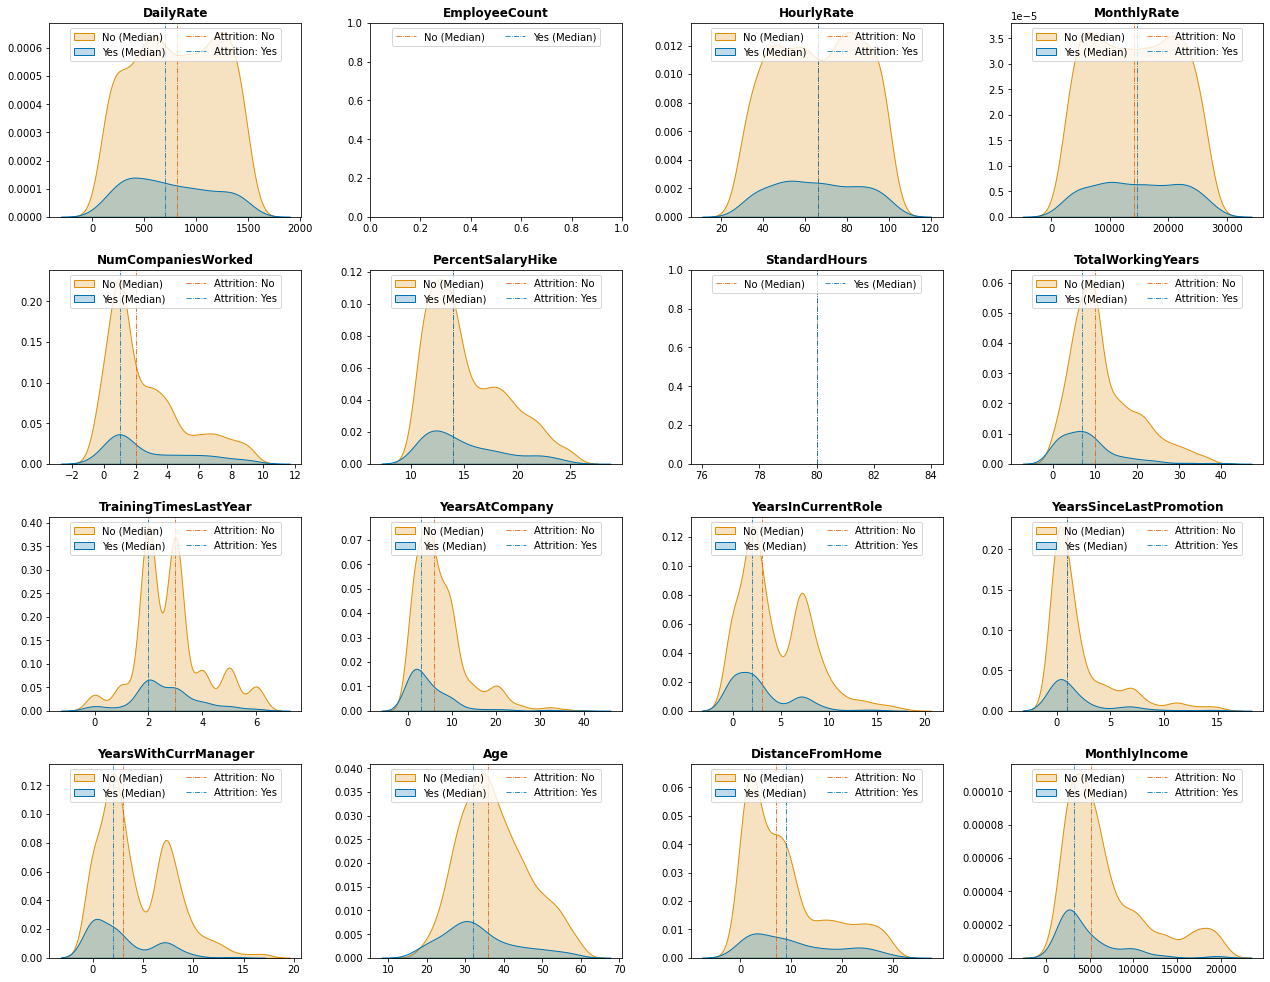

In [81]:
plt.figure(figsize = (18, 14))

for i in range(0, len(num)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x = num[i], hue = 'Attrition', data = df, palette = 'colorblind', linewidth = 1, fill = True, legend = True)
    
    plt.axvline(df[num[i]].loc[df['Attrition'] == 'No'].median(), color = '#e85d04', linewidth = 0.8, linestyle = '-.', label = 'No')
    plt.axvline(df[num[i]].loc[df['Attrition'] == 'Yes'].median(), color = '#0077b6', linewidth = 0.8, linestyle = '-.', label = 'Yes')
    
    plt.title(num[i], fontweight = 'bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(['No (Median)', 'Yes (Median)', 'Attrition: No', 'Attrition: Yes',], ncol = 2, loc = 'upper center')

# plt.savefig(f"{gd_path}/image/num-feature-attrition-kdep.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/image/num-feature-attrition-kdep.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 2.0)
plt.show()

# Feature Encoding

# --------------------------------------------------------------Can delete, Just for trial

In [84]:
le = LabelEncoder()

In [85]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [89]:
df[categorical_features]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [91]:
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['OverTime']=le.fit_transform(df['OverTime'])

In [93]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,Female,94,3,2,7,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,Male,61,2,2,6,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,Male,92,2,1,2,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,Female,56,3,1,6,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,Male,40,3,1,2,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


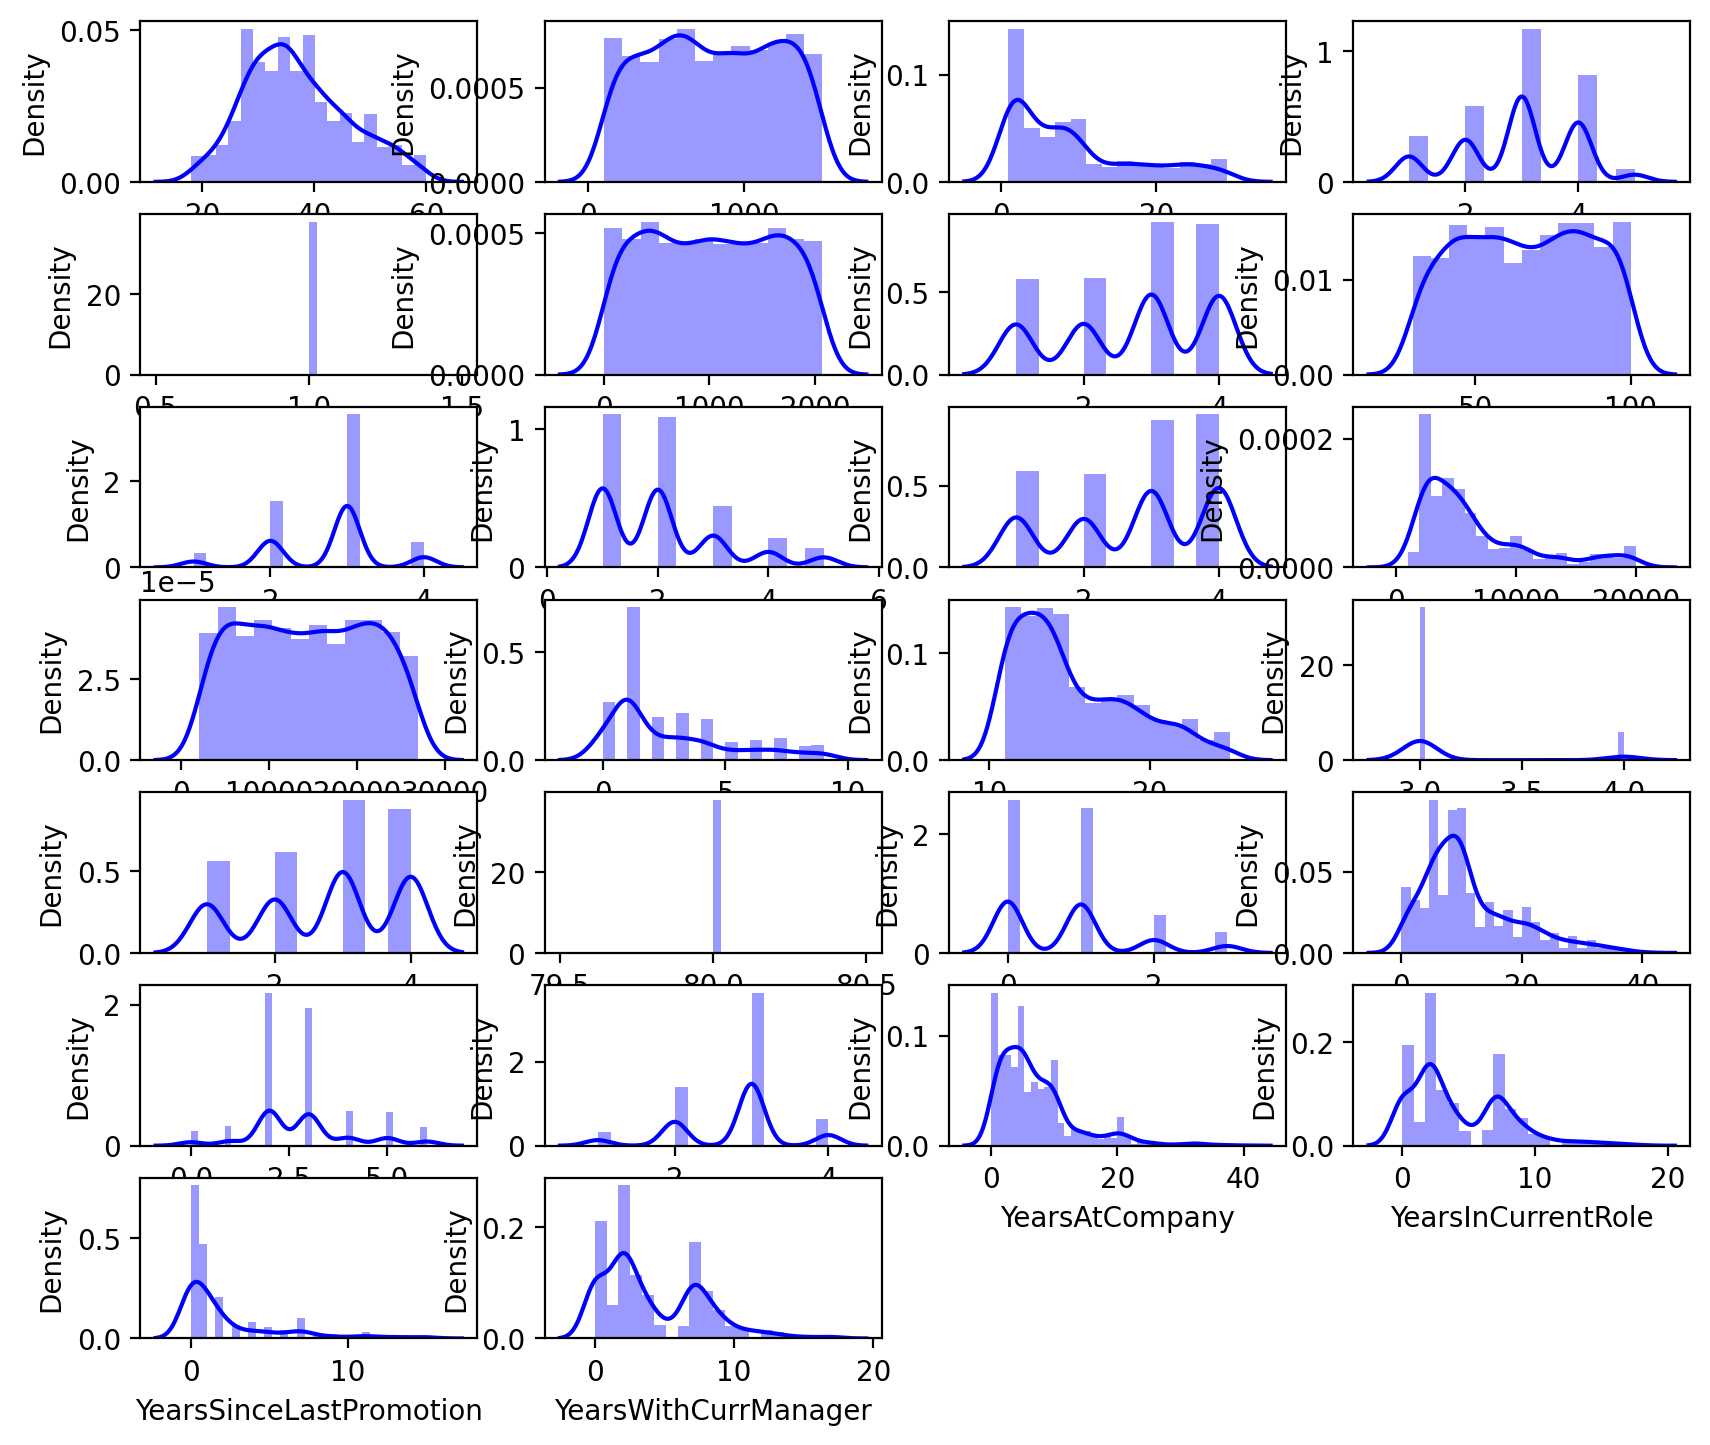

In [97]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(df[numerical_features]):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [102]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [103]:
x = [{'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'}]

In [ ]:
y = df[{'Attrition'}]

In [101]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

NameError: name 'x' is not defined